### RETAIL PRICE OPTIMIZATION

#### ABOUT PROJECT
Retail price optimization involves determining the optimal selling price for products or services to maximize revenue and profit.

Optimizing retail prices means finding the perfect balance between the price you charge for your products and the number of products you can sell at that price.

The ultimate aim is to charge a price that helps you make the most money and attracts enough customers to buy your products. It involves using data and pricing strategies to find the right price that maximizes your sales and profits while keeping customers happy.

Project Source: https://thecleverprogrammer.com/2023/04/17/retail-price-optimization-using-python/

#### ABOUT DATA
Data Source: https://www.kaggle.com/datasets/suddharshan/retail-price-optimization

The data contains the demand and corresponding average unit price at a product - month_year level.

`product_id`: A unique identifier for each product in the dataset.

`product_category_name`: The name of the product category to which the product belongs.

`month_year`: The month and year of the retail transaction or data recording.

`qty`: The quantity of the product sold or purchased in a given transaction.

`total_price`: The total price of the product, including any applicable taxes or discounts.

`freight_price`: The cost of shipping or freight associated with the product.

`unit_price`: The price of a single unit of the product.

`product_name_length`: The length of the product name in terms of the number of characters.

`product_description_length`: The length of the product description in terms of the number of characters.

`product_photos_qty`: The number of photos available for the product in the dataset.

`product_weight_g`: The weight of the product in grams.

`product_score`: A score or rating associated with the product’s quality, popularity, or other relevant factors.

`customers`: The number of customers who purchased the product in a given transaction.

`weekday`: The day of the week on which the transaction occurred.

`weekend`: A binary flag indicating whether the transaction occurred on a weekend (1) or not (0).

`holiday`: A binary flag indicating whether the transaction occurred on a holiday (1) or not (0).

`month`: The month in which the transaction occurred.

`year`: The year in which the transaction occurred: the effect of seasonality

`comp_1, comp_2, comp_3`: Competitor information or variables related to competitors’ prices, promotions, or other relevant factors.

`ps1, ps2, ps3`: Product score or rating associated with competitors’ products.

`fp1, fp2, fp3`: Freight or shipping cost associated with competitors’ products.

In [1]:
# import matplotlib.pyplot as plt
import matplotlib as mpl

import optuna
import warnings

from glob import glob #library that helps us search for files
import scipy
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import random

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder,TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold,StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from scipy.special import inv_boxcox
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import sklearn.svm
from sklearn.neural_network import MLPRegressor
warnings.simplefilter(action="ignore")
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import VarianceThreshold
#pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
df = pd.read_csv('/Users/USER/Documents/DATASETS/retail_price.csv')
df.head()


product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  product_weight_g  product_score  customers  weekday  \
0                   2               350            4.0         57       23   
1                   2               350            4.0         61       22   
2                   2               350            4.0        123       21   
3                   2               350            4.0         90       23   
4                   2               350            4.0         54       21   

   weekend  holiday  month  year          s  volume  comp_1  ps1        fp1  \
0        8        1      5  2017  10.267394    3800    89.9  3.9  15.011897   
1        8        1      6  2017   6.503115    3800    89.9  3.9  14.769216   
2       10        1      7  2017  12.071651    3800    89.9  3.9  13.993833   
3        8        1      8  2017   9.293873    3800    89.9  3.9  14.656757   
4        9        1      9  2017   5.555556    3800    89.9  3.9  18.776522   

       comp_2  ps2        fp2  comp_3  ps3        fp3  lag_price  
0  215.000000  4.4   8.760000   45.95  4.0  15.100000      45.90  
1  209.000000  4.4  21.322000   45.95  4.0  12.933333      45.95  
2  205.000000  4.4  22.195932   45.95  4.0  14.840000      45.95  
3  199.509804  4.4  19.412885   45.95  4.0  14.287500      45.95  
4  163.398710  4.4  24.324687   45.95  4.0  15.100000      45.95

In [3]:
df.shape

(676, 30)

In [4]:
df.describe()

qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000000            1.000000   
50%              51.000000                  501.000000            1.500000   
75%              57.000000                  903.000000            2.000000   
max              60.000000                 3006.000000            8.000000   

       product_weight_g  product_score   customers     weekday     weekend  \
count        676.000000     676.000000  676.000000  676.000000  676.000000   
mean        1847.498521       4.085503   81.028107   21.773669    8.658284   
std         2274.808483       0.232021   62.055560    0.986104    0.705600   
min          100.000000       3.300000    1.000000   20.000000    8.000000   
25%          348.000000       3.900000   34.000000   21.000000    8.000000   
50%          950.000000       4.100000   62.000000   22.000000    9.000000   
75%         1850.000000       4.200000  116.000000   23.000000    9.000000   
max         9750.000000       4.500000  339.000000   23.000000   10.000000   

          holiday       month         year           s        volume  \
count  676.000000  676.000000   676.000000  676.000000    676.000000   
mean     1.494083    6.192308  2017.525148   14.644970  10664.627219   
std      0.940430    3.243455     0.499737   11.930276   9172.801850   
min      0.000000    1.000000  2017.000000    0.484262    640.000000   
25%      1.000000    3.000000  2017.000000    7.510204   3510.000000   
50%      1.000000    6.000000  2018.000000   11.316760   8000.000000   
75%      2.000000    8.000000  2018.000000   17.745704  15750.000000   
max      4.000000   12.000000  2018.000000  100.000000  32736.000000   

           comp_1         ps1         fp1      comp_2         ps2         fp2  \
count  676.000000  676.000000  676.000000  676.000000  676.000000  676.000000   
mean    79.452054    4.159467   18.597610   92.930079    4.123521   18.620644   
std     47.933358    0.121652    9.406537   49.481269    0.207189    6.424174   
min     19.900000    3.700000    0.095439   19.900000    3.300000    4.410000   
25%     49.910000    4.100000   13.826429   53.900000    4.100000   14.485000   
50%     69.900000    4.200000   16.618984   89.990000    4.200000   16.811765   
75%    104.256549    4.200000   19.732500  117.888889    4.200000   21.665238   
max    349.900000    4.500000   57.230000  349.900000    4.400000   57.230000   

           comp_3         ps3         fp3   lag_price  
count  676.000000  676.000000  676.000000  676.000000  
mean    84.182642    4.002071   17.965007  107.399684  
std     47.745789    0.233292    5.533256   76.974657  
min     19.900000    3.500000    7.670000   19.850000  
25%     53.785714    3.900000   15.042727   55.668750  
50%     59.900000    4.000000   16.517110   89.900000  
75%     99.990000    4.100000   19.447778  129.990000  
max    255.610000    4.400000   57.230000  364.000000

In [5]:
df.describe(include='O')

product_id product_category_name  month_year
count         676                   676         676
unique         52                     9          20
top       health5          garden_tools  01-03-2018
freq           20                   160          50

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

### Check for whitespaces

In [7]:
#in columns
[i for i in df.columns if i.startswith(' ') or i.endswith(' ')]

[]

In [8]:
#in data
for i in df.columns:
    print(df[df[i]== ' '])

Empty DataFrame
Columns: [product_id, product_category_name, month_year, qty, total_price, freight_price, unit_price, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_score, customers, weekday, weekend, holiday, month, year, s, volume, comp_1, ps1, fp1, comp_2, ps2, fp2, comp_3, ps3, fp3, lag_price]
Index: []
Empty DataFrame
Columns: [product_id, product_category_name, month_year, qty, total_price, freight_price, unit_price, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_score, customers, weekday, weekend, holiday, month, year, s, volume, comp_1, ps1, fp1, comp_2, ps2, fp2, comp_3, ps3, fp3, lag_price]
Index: []
Empty DataFrame
Columns: [product_id, product_category_name, month_year, qty, total_price, freight_price, unit_price, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_score, customers, weekday, weekend, holiday, month, year, s, volume, comp

### Duplicates

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [product_id, product_category_name, month_year, qty, total_price, freight_price, unit_price, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_score, customers, weekday, weekend, holiday, month, year, s, volume, comp_1, ps1, fp1, comp_2, ps2, fp2, comp_3, ps3, fp3, lag_price]
Index: []

### Adding new variables

In [10]:
df['diff_in_price'] = df['unit_price'] - df['comp_1']
df['revenue'] = df['qty'] * df['total_price']
df['profit'] = df['revenue'] - df['freight_price']
df['diff_in_ps'] = df['product_score'] - df['ps1']

### Split

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

### Exploring data

In [12]:
df = train.copy()

### Null values

In [13]:
total = np.product(df.shape)
nulls = df.isnull().sum().sum()

(nulls/total)*100

0.0

In [14]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
diff_in_price                 0
revenue 

### Univariate analysis and cardinality of categorical columns

In [15]:
cat = df.select_dtypes('O').columns

In [16]:
for i in cat:
    print(i.upper())
    print(f'Number of unique values in {i}:', df[i].nunique())
    print()
    print(f'Unique values in {i}:', df[i].unique())
    print()
    print(f'Frequency of unique values in {i}:', df[i].value_counts(normalize=True))
    print()
    print('_________________________________________________________________')

PRODUCT_ID
Number of unique values in product_id: 52

Unique values in product_id: ['computers1' 'perfumery1' 'garden9' 'garden6' 'computers5' 'garden4'
 'furniture3' 'health7' 'watches6' 'bed4' 'garden8' 'consoles1' 'health2'
 'garden10' 'garden3' 'watches8' 'health1' 'bed2' 'bed1' 'perfumery2'
 'cool4' 'health3' 'watches3' 'health9' 'health5' 'furniture2'
 'computers3' 'health4' 'garden2' 'watches7' 'computers4' 'watches4'
 'garden1' 'watches1' 'bed3' 'cool5' 'watches2' 'watches5' 'health10'
 'cool2' 'health8' 'computers6' 'consoles2' 'cool1' 'computers2' 'garden7'
 'furniture4' 'cool3' 'garden5' 'health6' 'furniture1' 'bed5']

Frequency of unique values in product_id: health5       0.031481
garden2       0.029630
health7       0.029630
garden9       0.027778
health8       0.027778
watches1      0.027778
health9       0.025926
garden6       0.025926
garden1       0.025926
computers4    0.025926
cool1         0.025926
garden10      0.025926
bed2          0.024074
watches6      0.02407

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

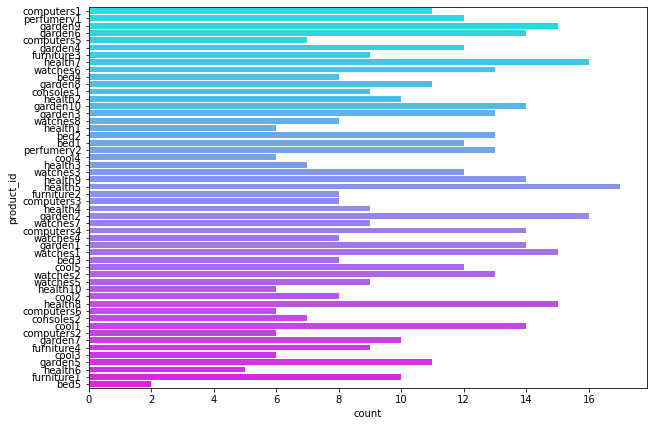

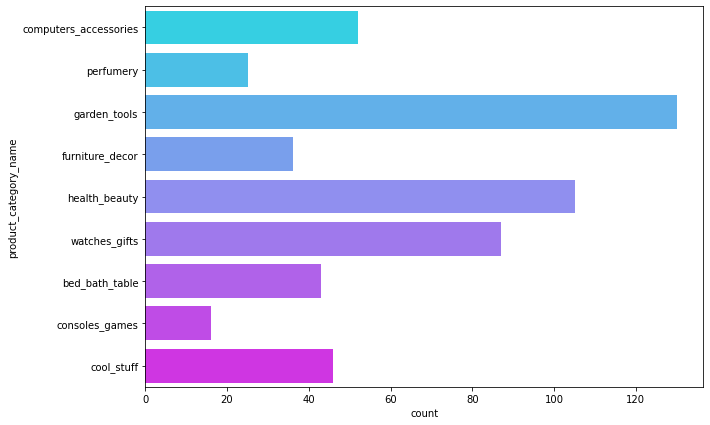

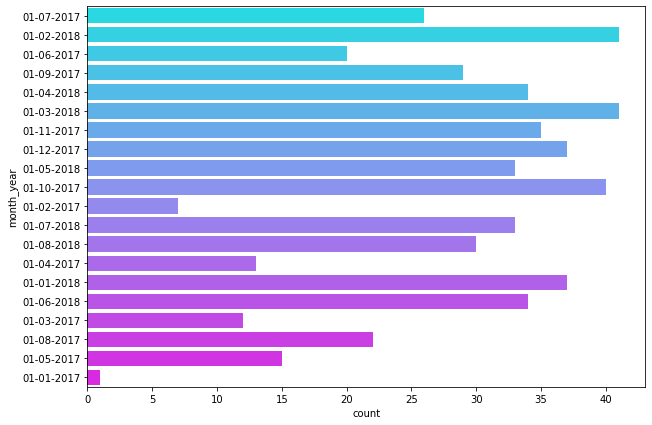

In [17]:
for i in cat:
    plt.figure(figsize = (10,7))
    sns.countplot(y = df[i], palette='cool')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

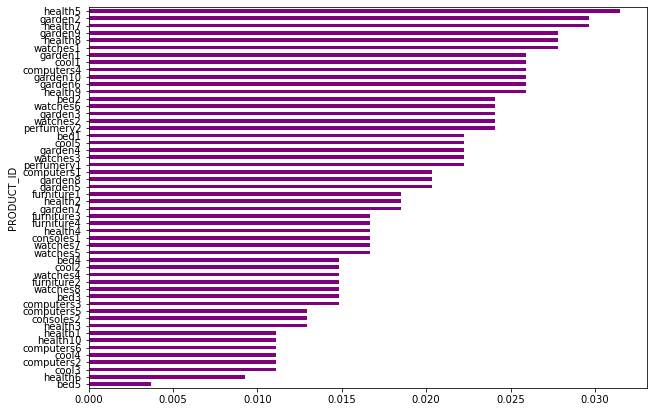

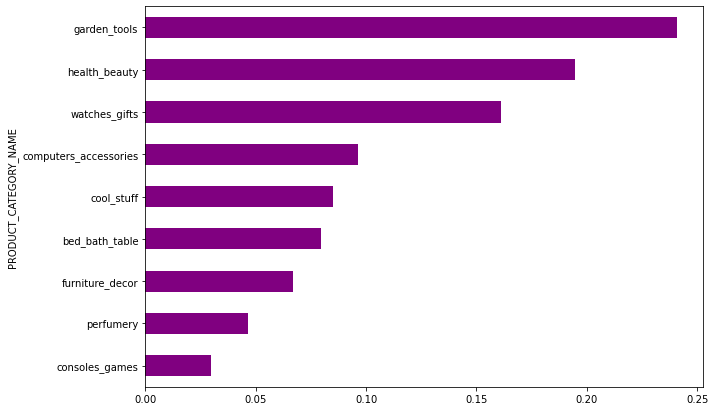

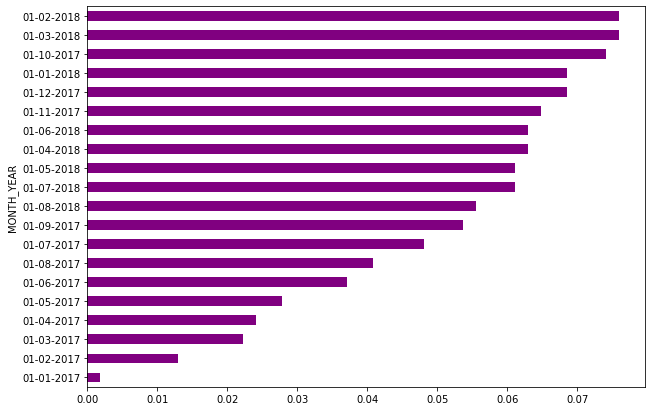

In [18]:
for i in cat:
    plt.figure(figsize = (10,7))
    df[i].value_counts(normalize=True).sort_values().plot(kind='barh',color='purple')
    plt.ylabel(i.upper())

### Univariate analysis and numerical distribution

In [19]:
num = df.select_dtypes('number').columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

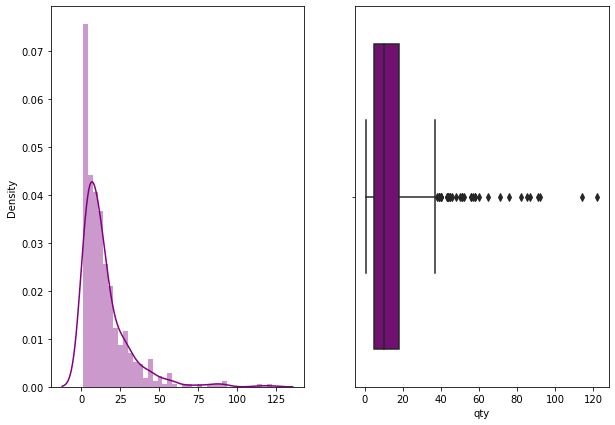

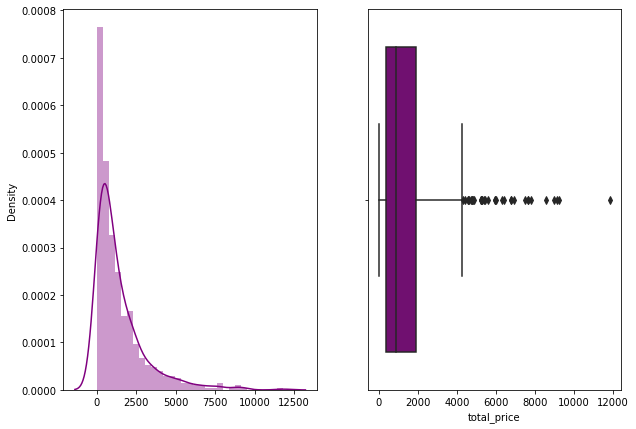

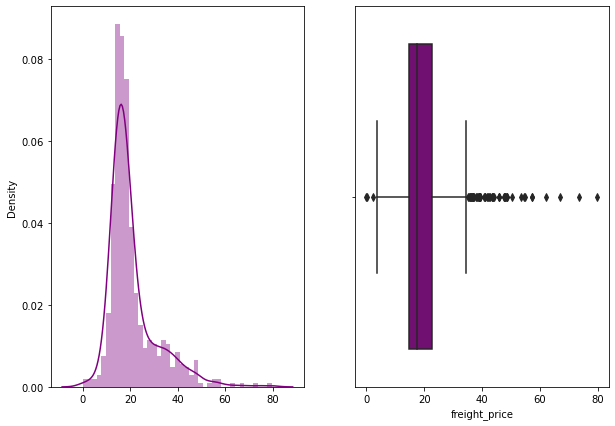

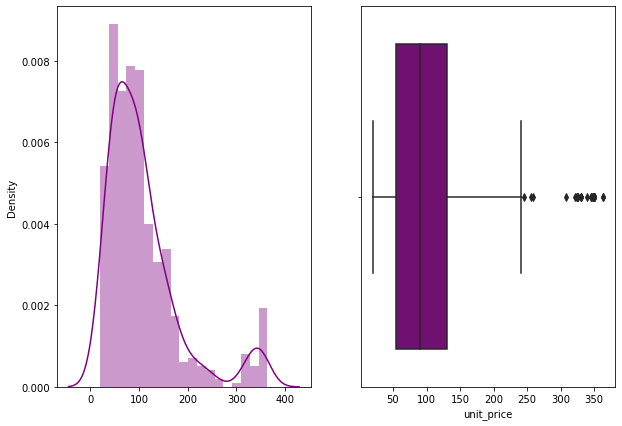

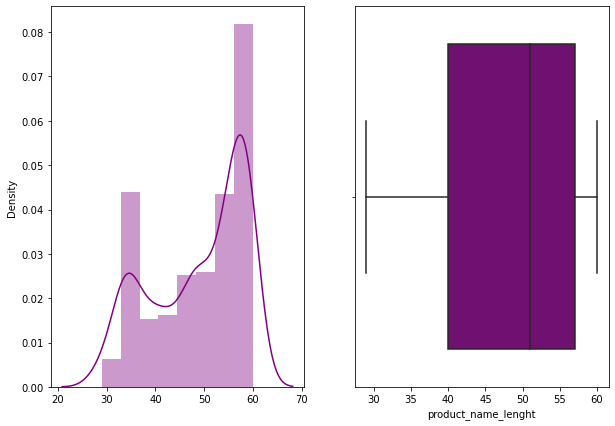

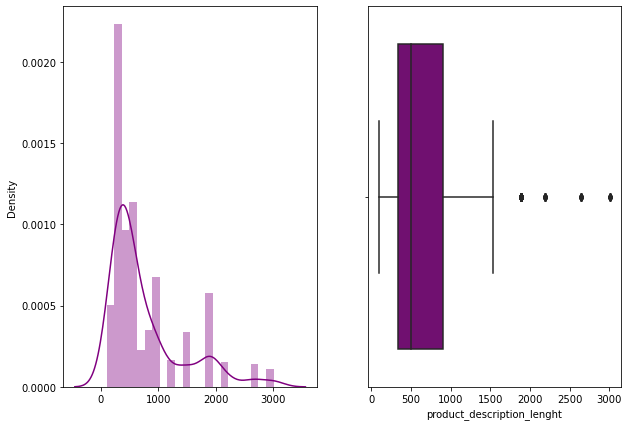

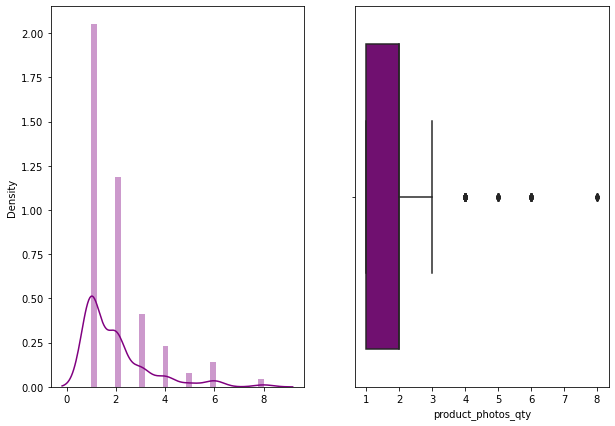

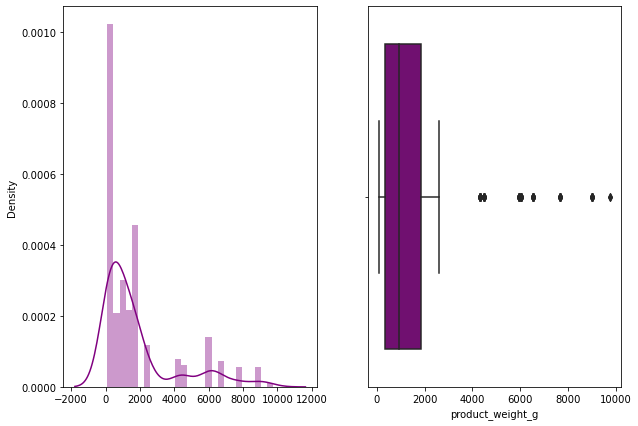

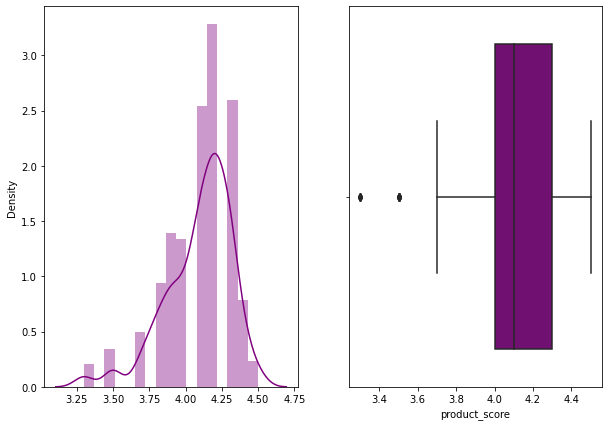

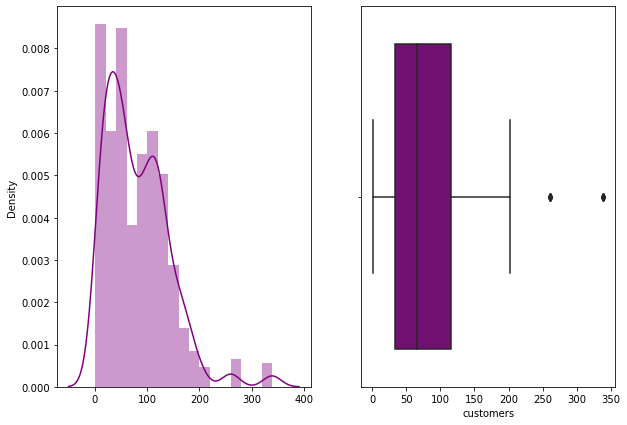

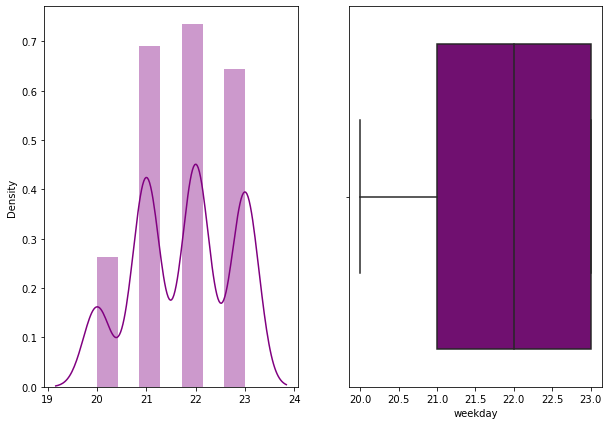

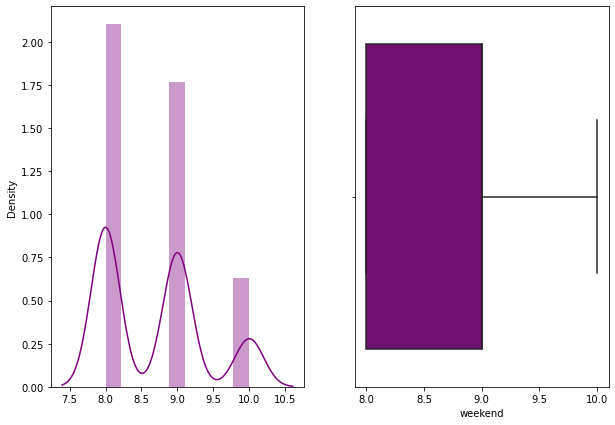

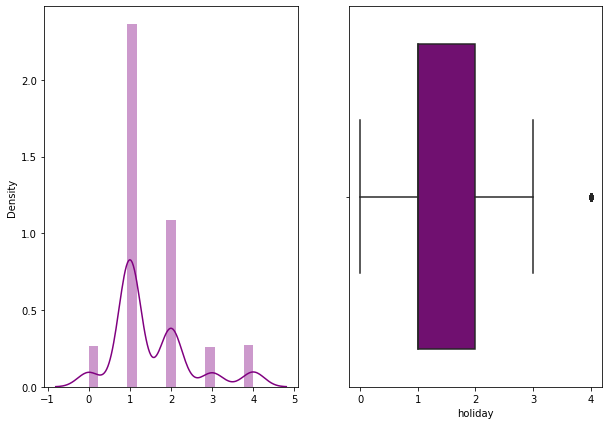

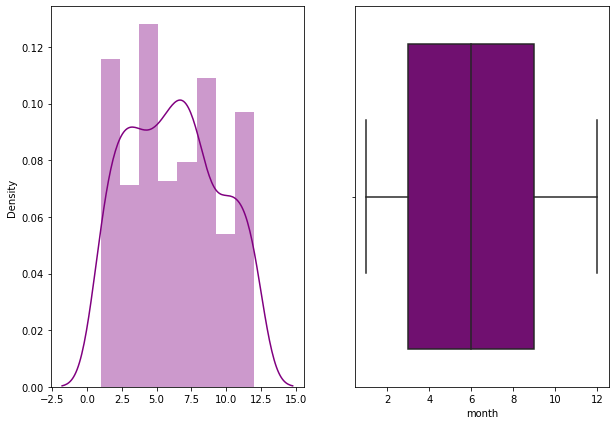

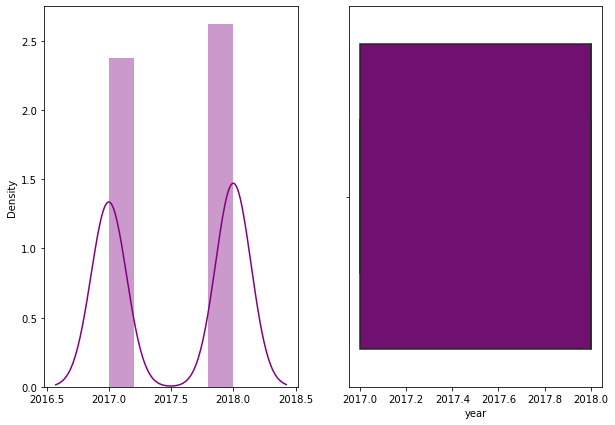

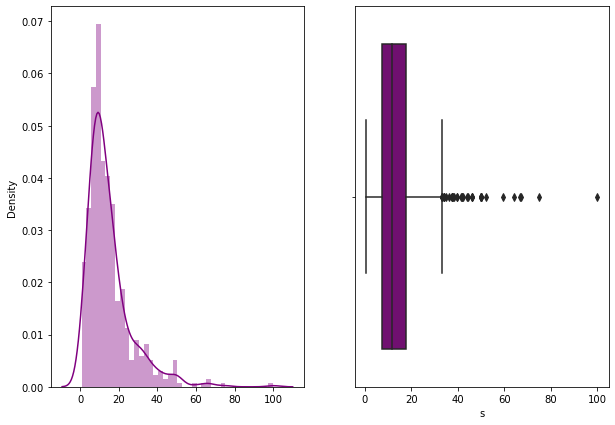

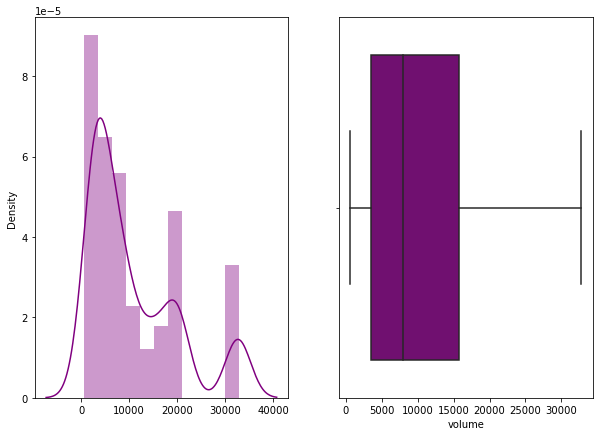

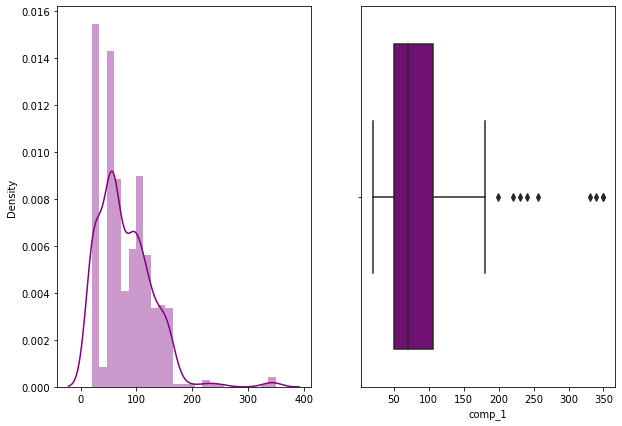

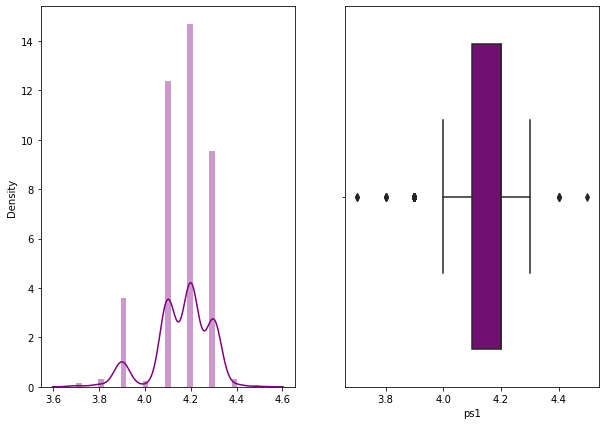

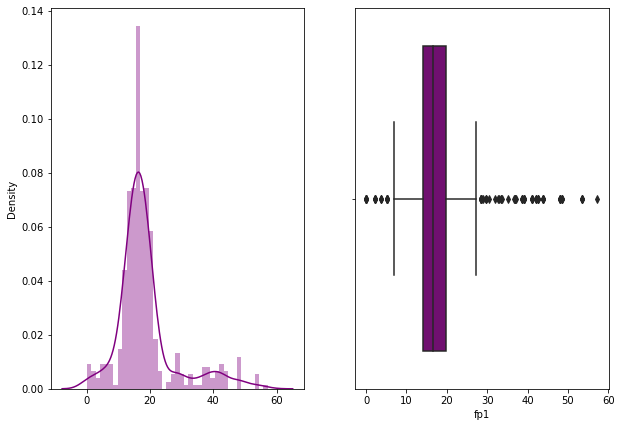

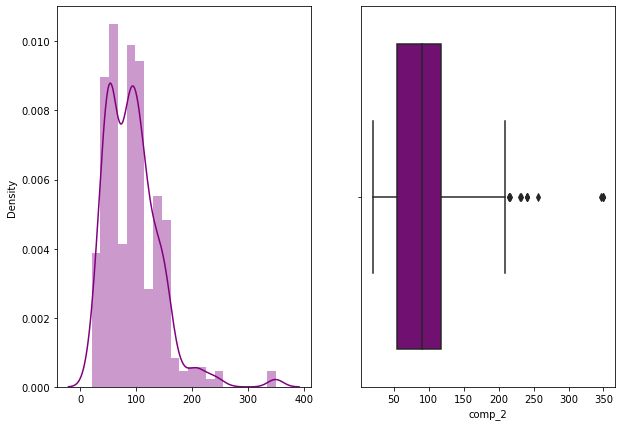

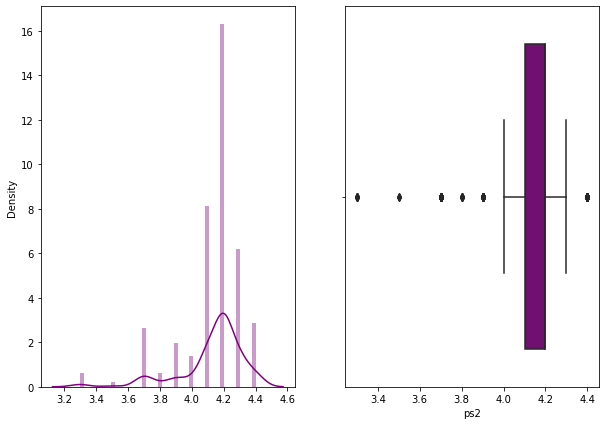

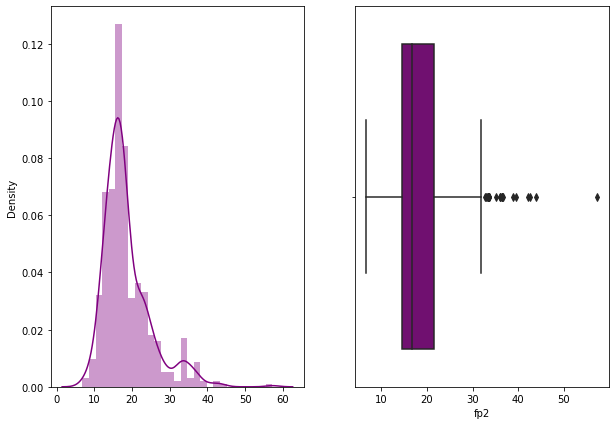

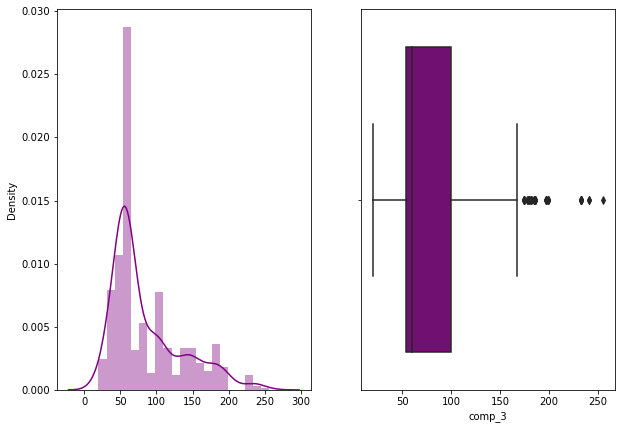

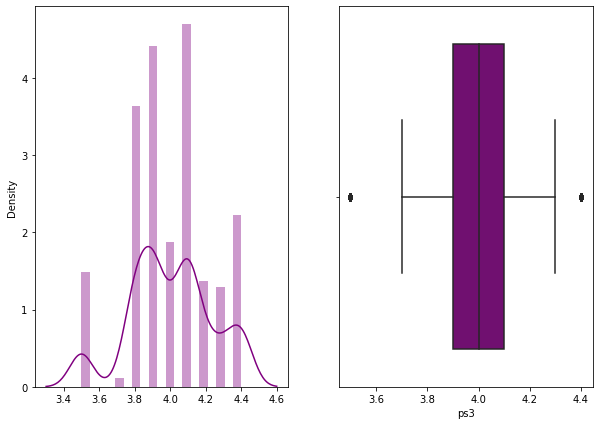

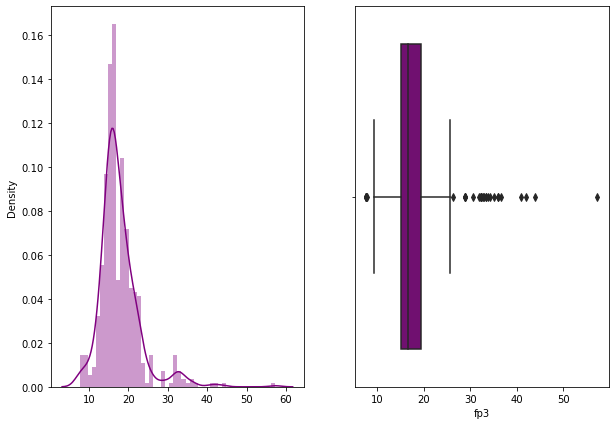

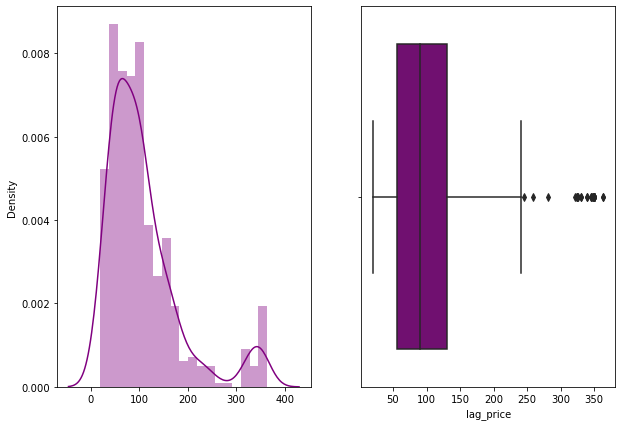

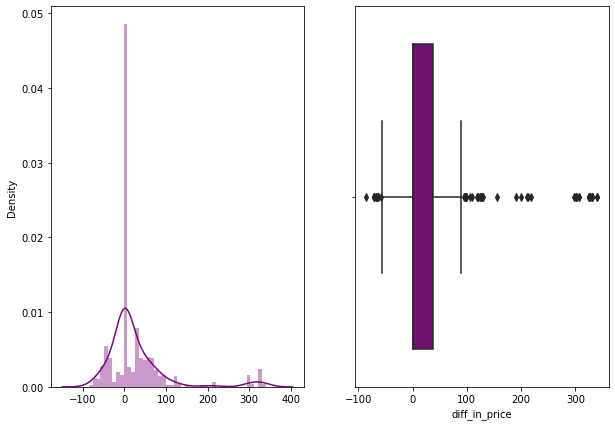

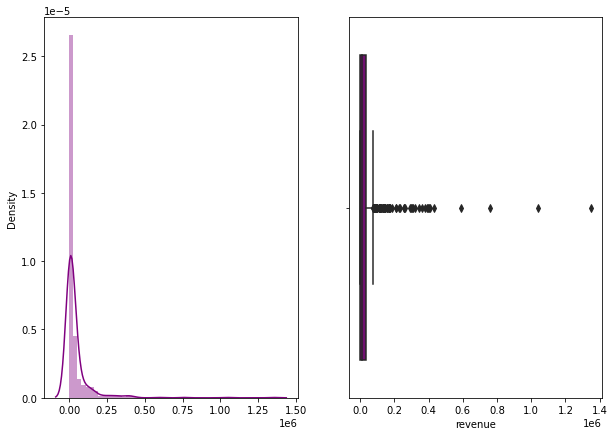

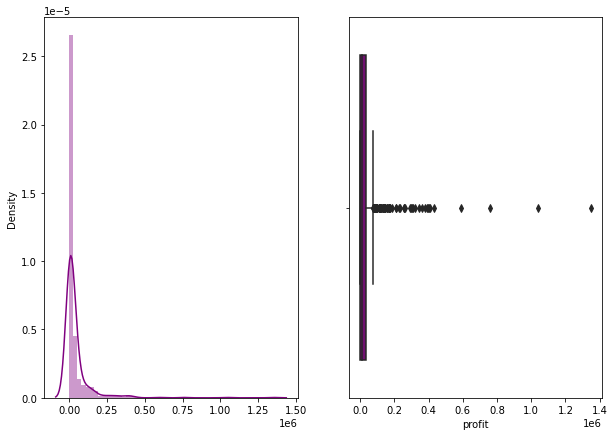

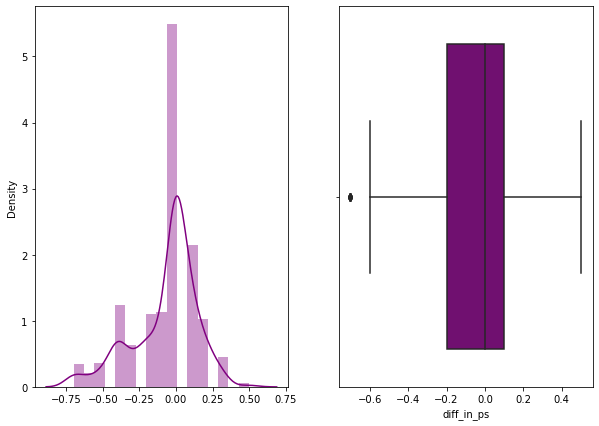

In [20]:
for i in num:
    plt.figure(figsize = (10,7))
    
    plt.subplot(121)
    sns.distplot(x = df[i], color='purple')
    
    plt.subplot(122)
    sns.boxplot(x = df[i], color='purple')

### Bivariate analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

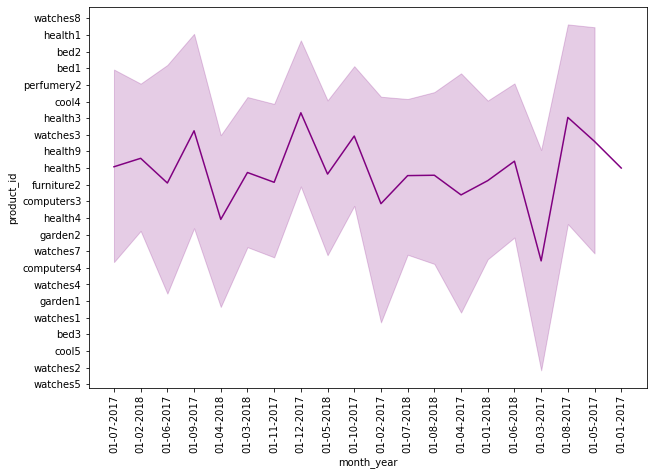

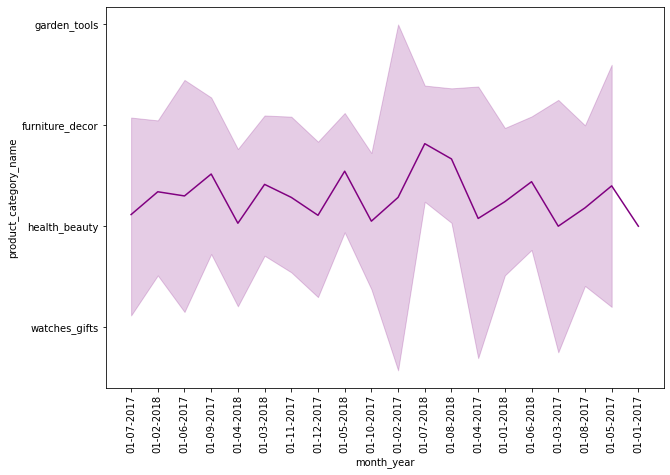

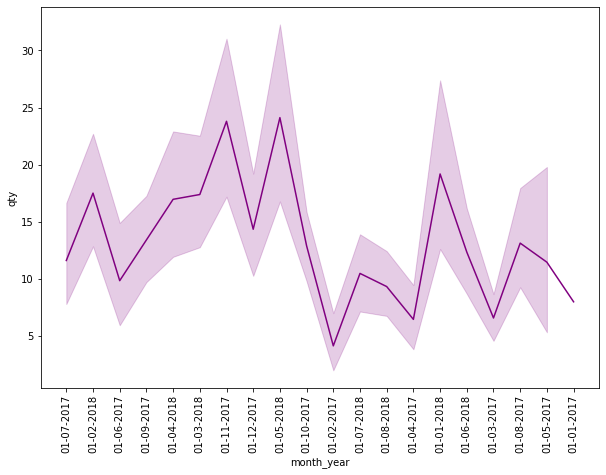

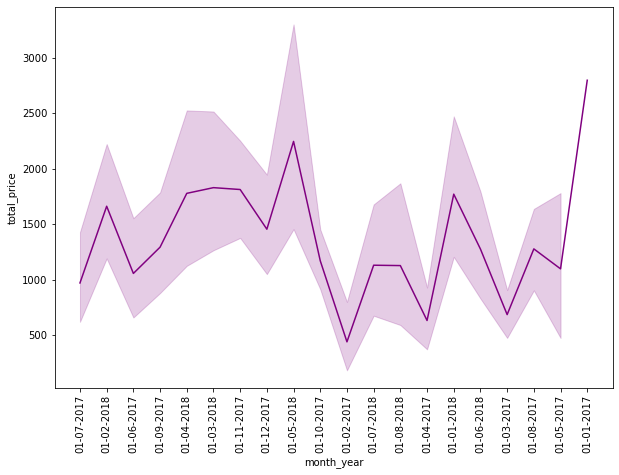

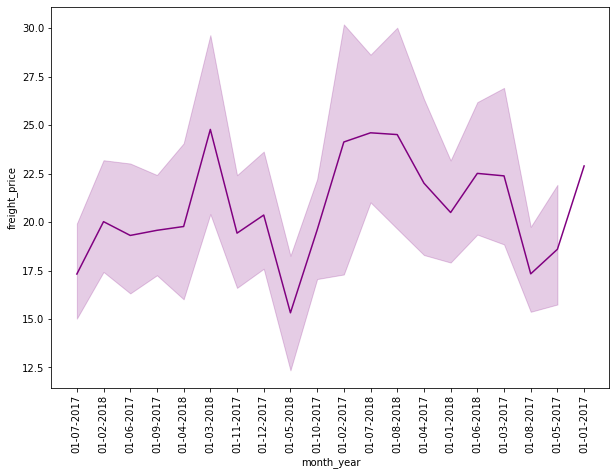

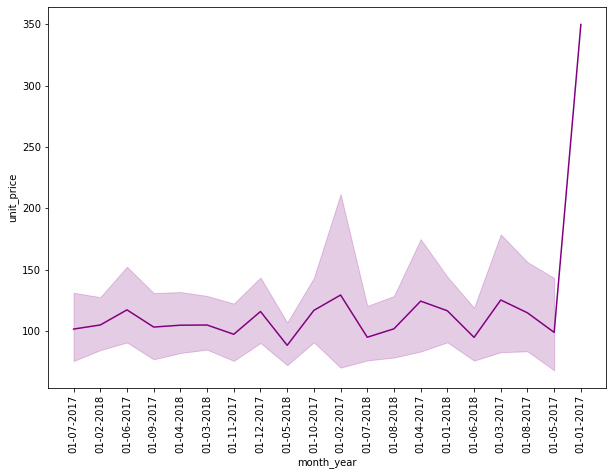

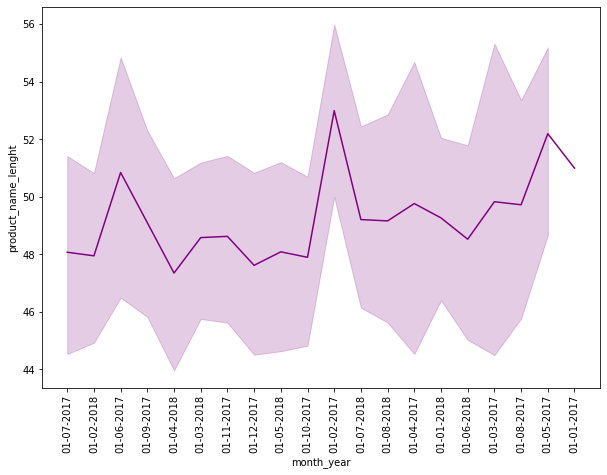

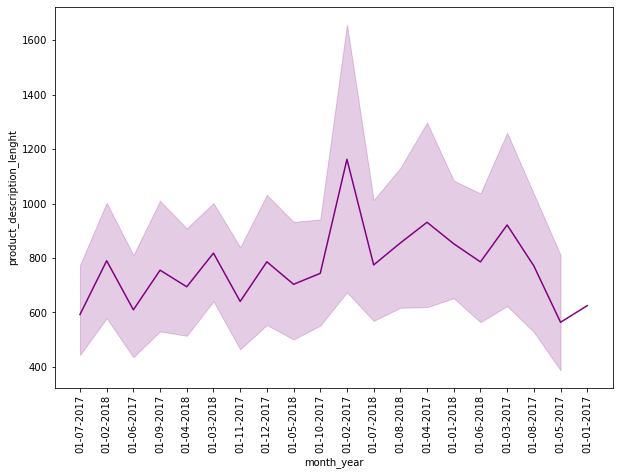

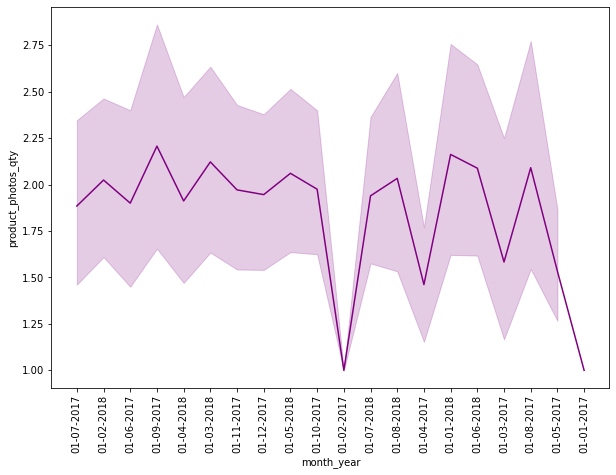

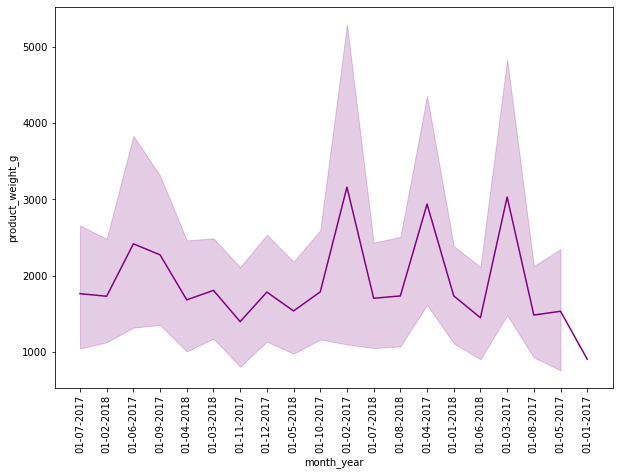

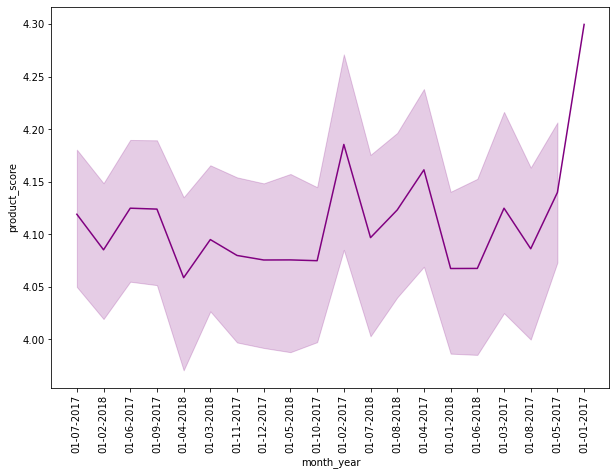

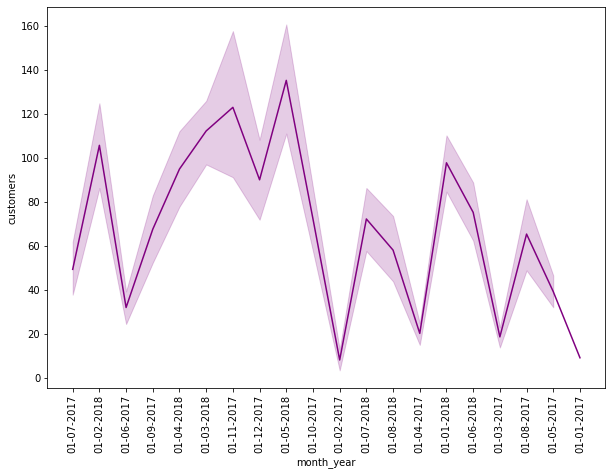

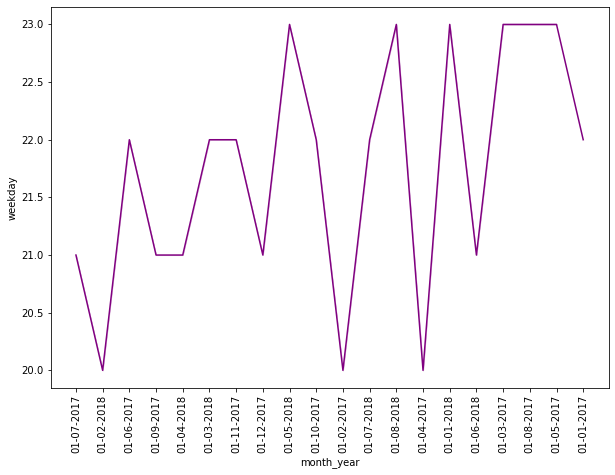

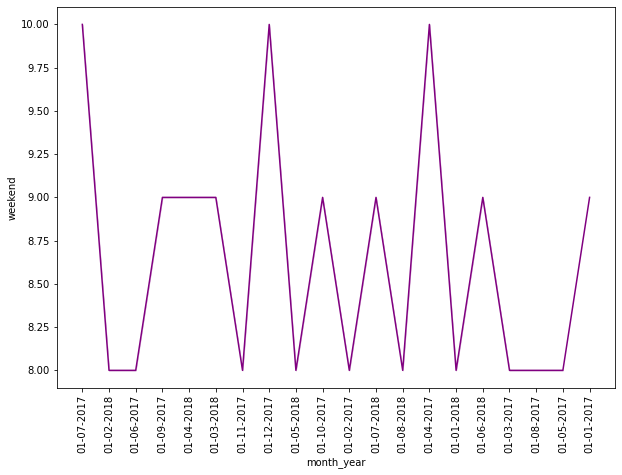

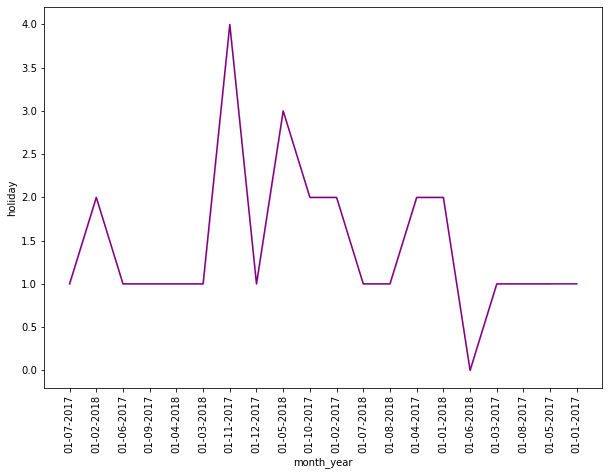

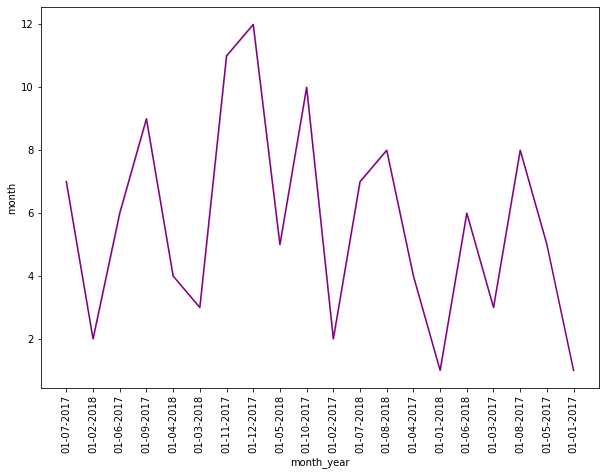

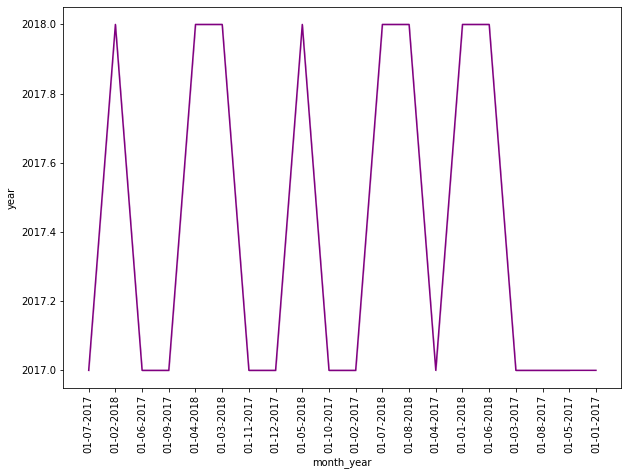

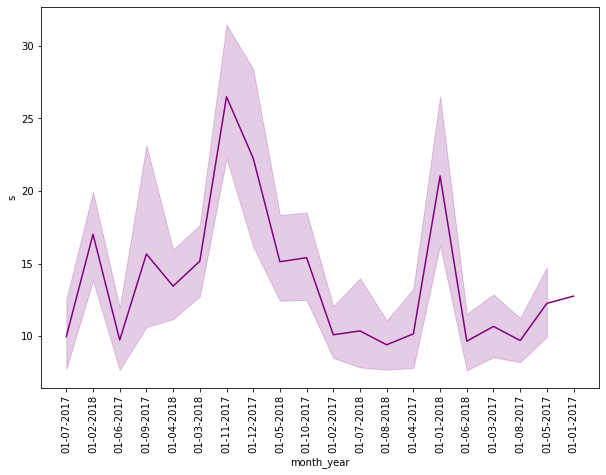

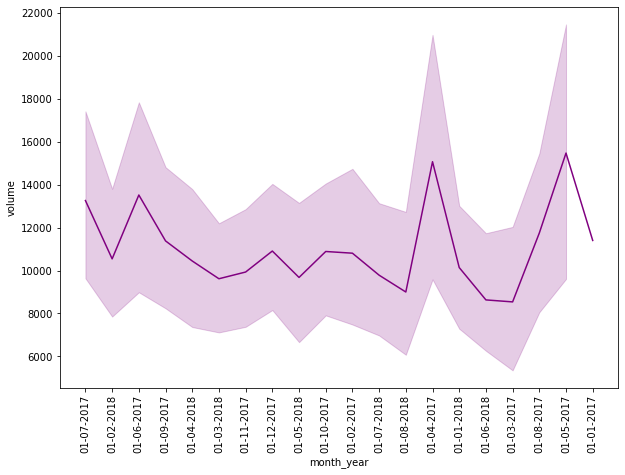

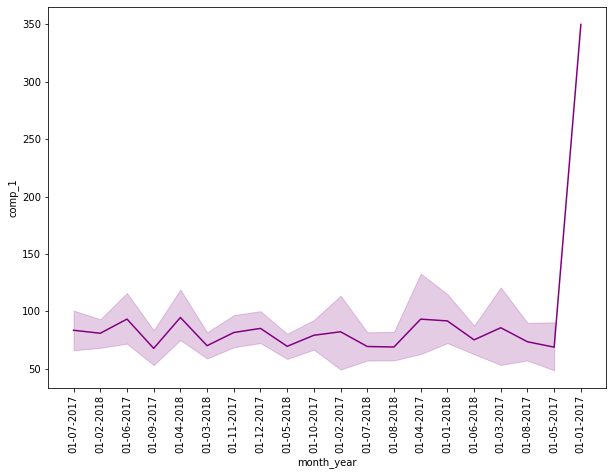

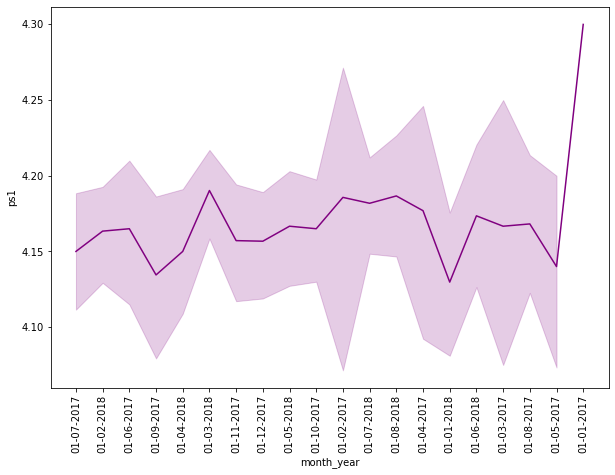

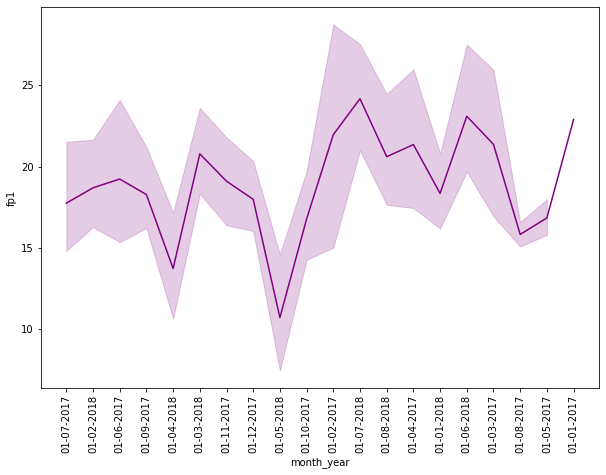

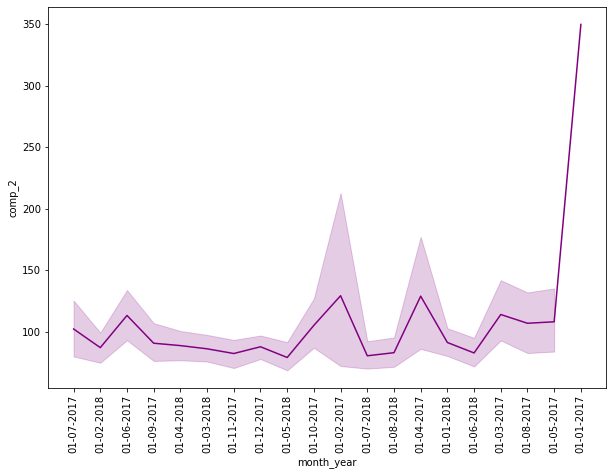

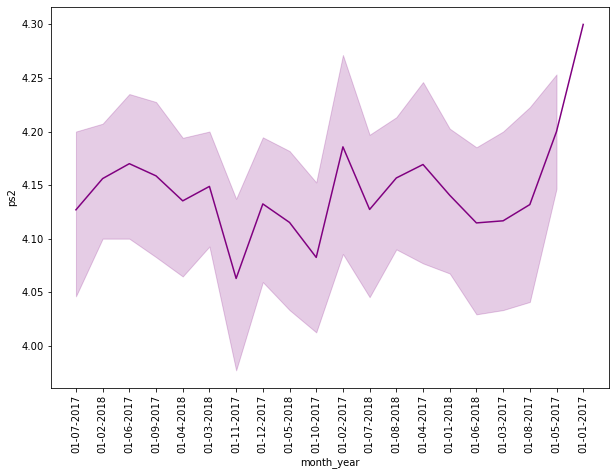

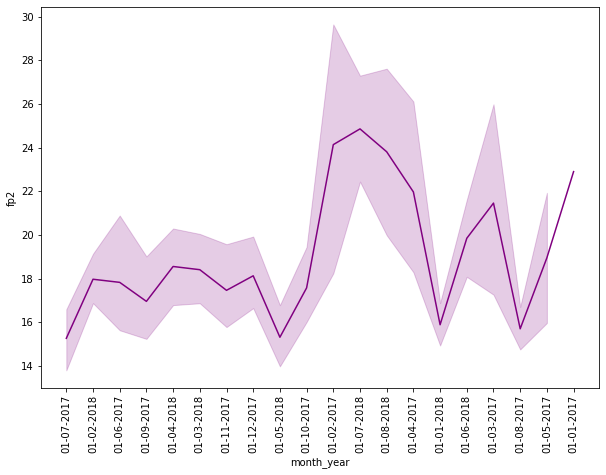

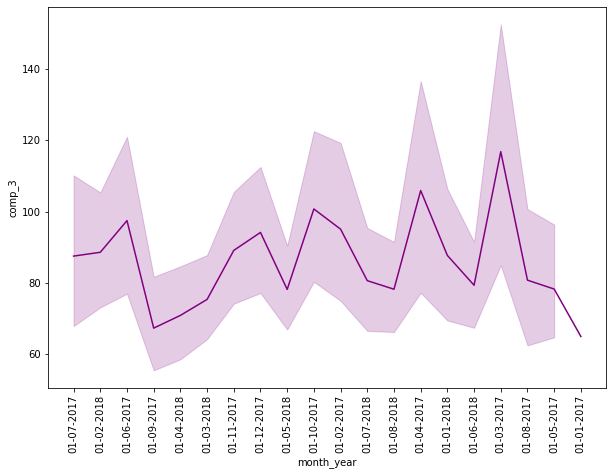

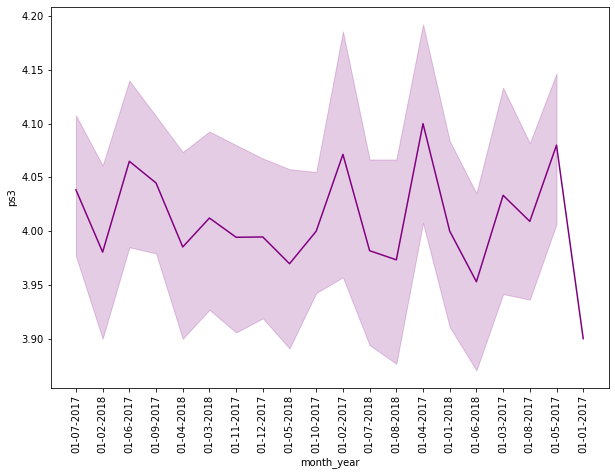

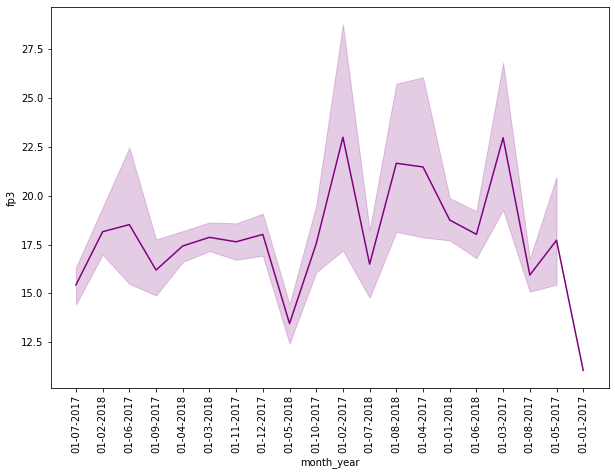

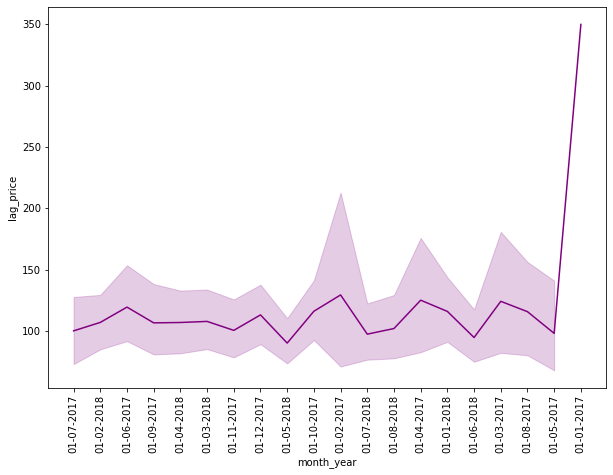

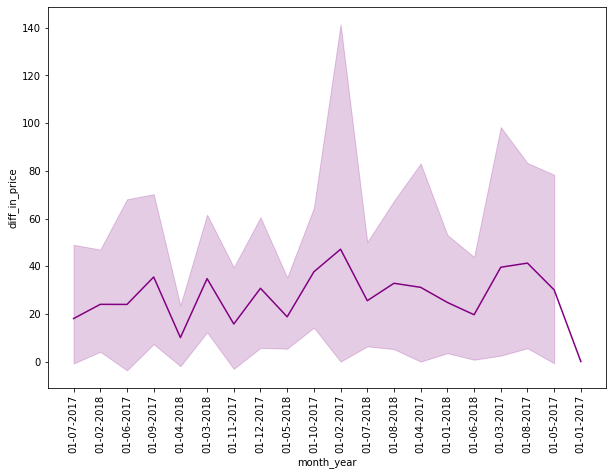

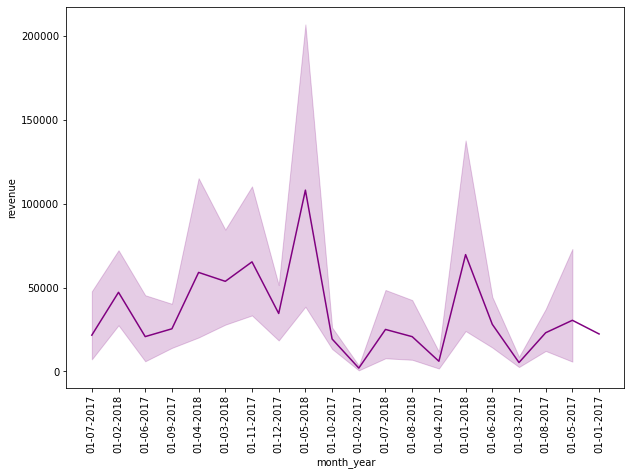

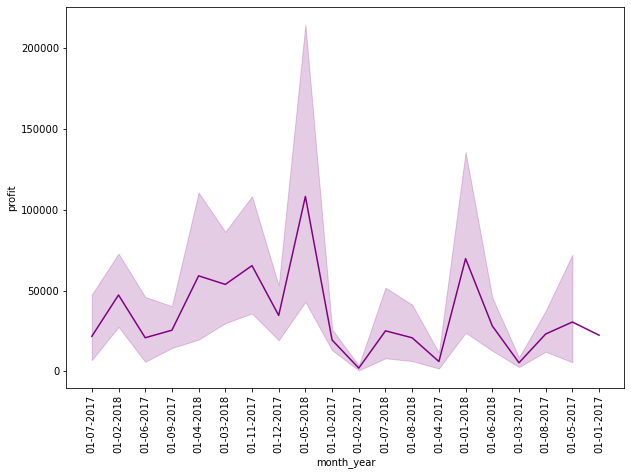

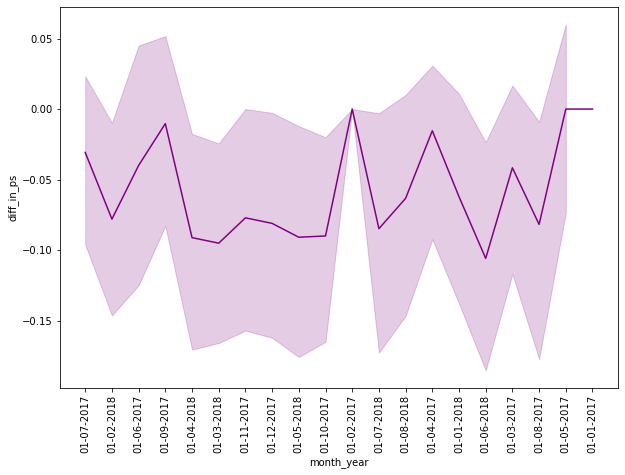

In [21]:
for i in df.drop(['month_year'], axis=1).columns:
    plt.figure(figsize = (10,7))
    
    sns.lineplot(data=df, x='month_year', y=i, color ='purple')
    plt.xticks(rotation=90
              )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

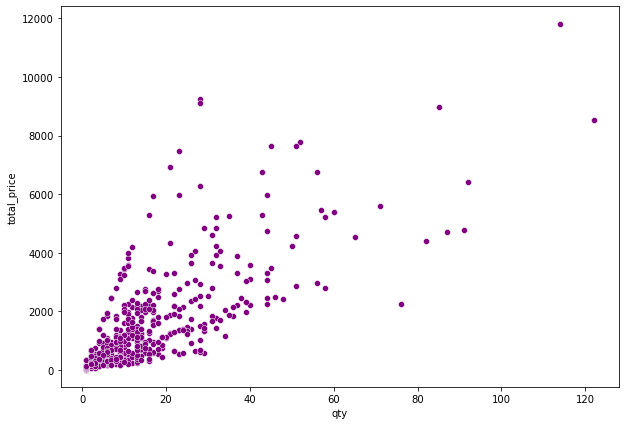

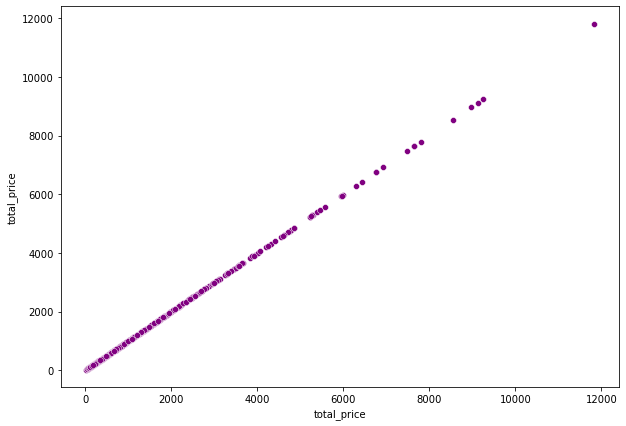

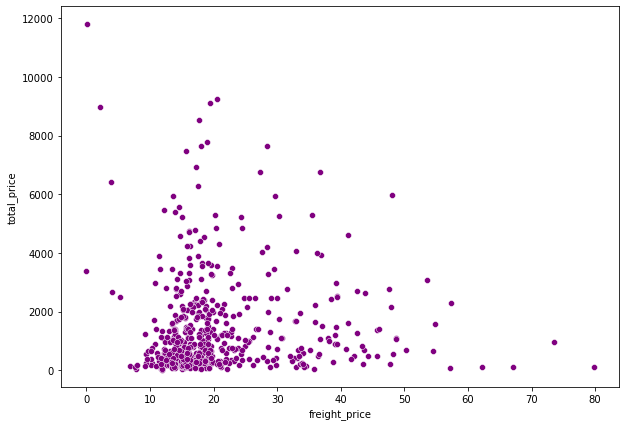

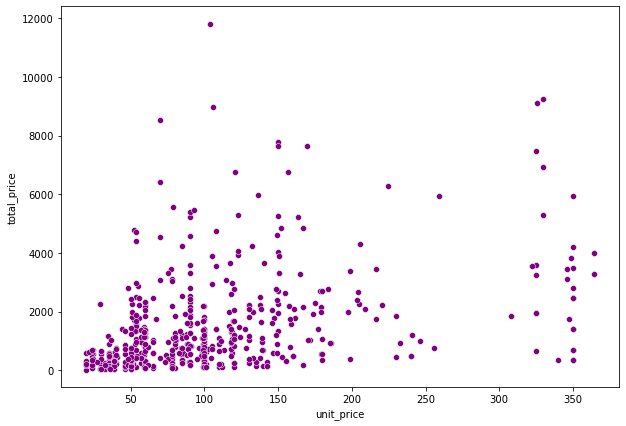

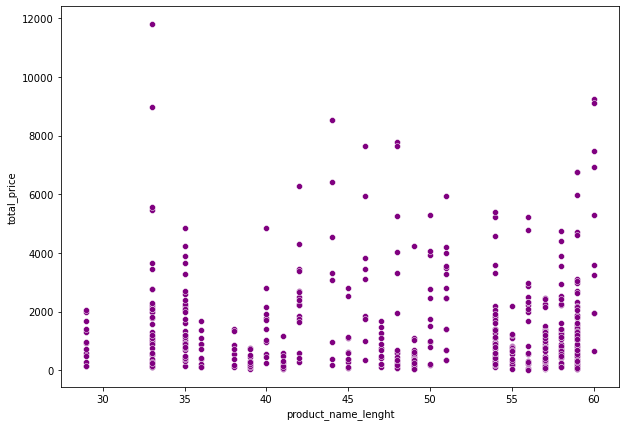

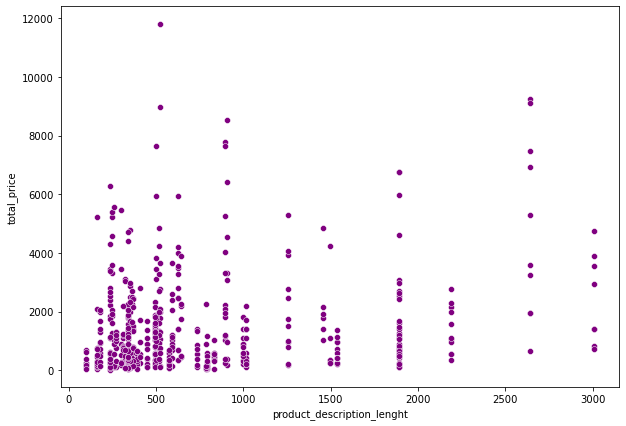

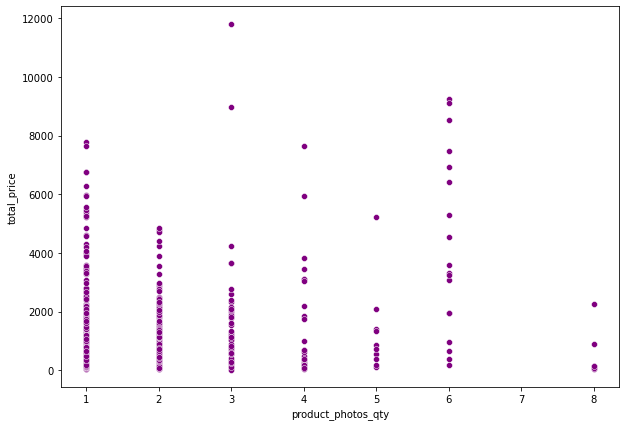

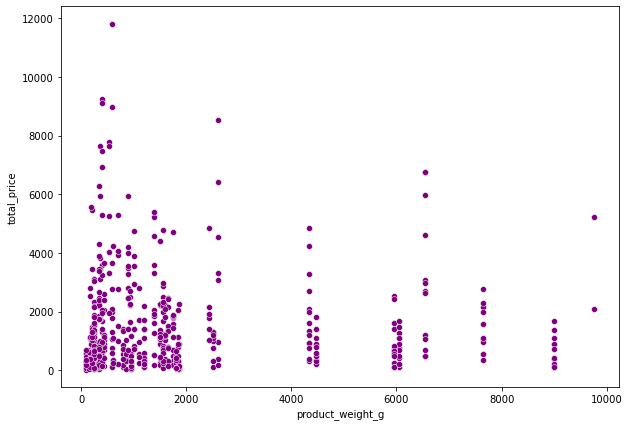

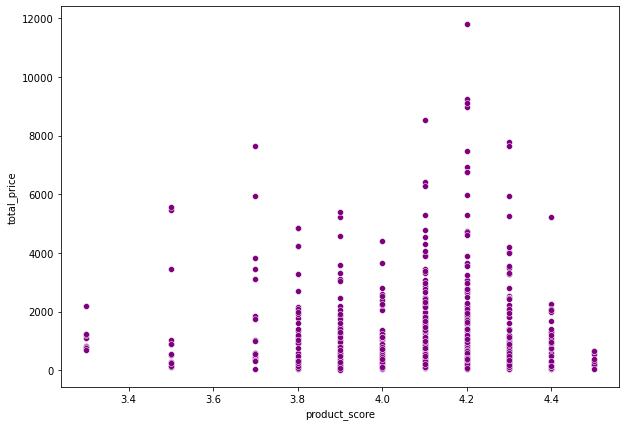

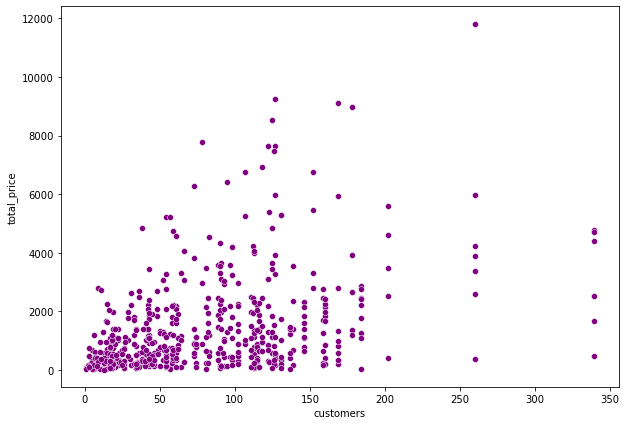

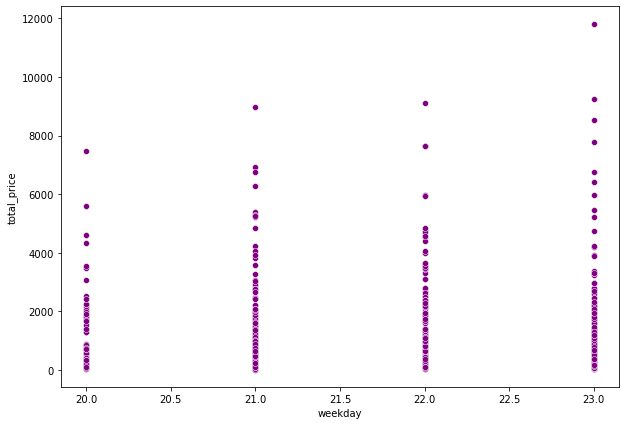

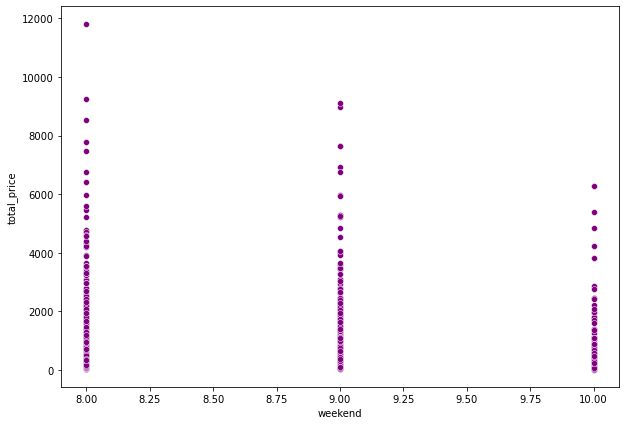

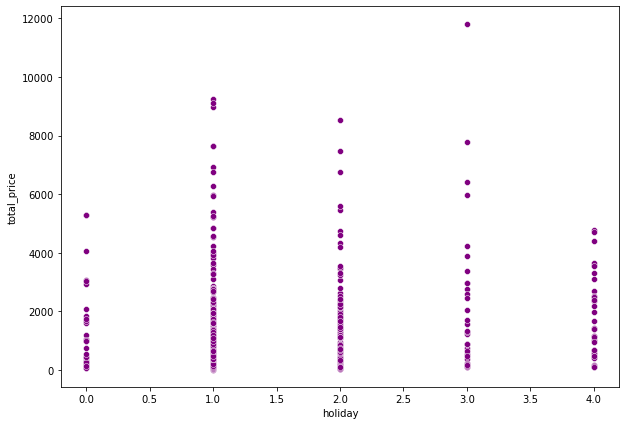

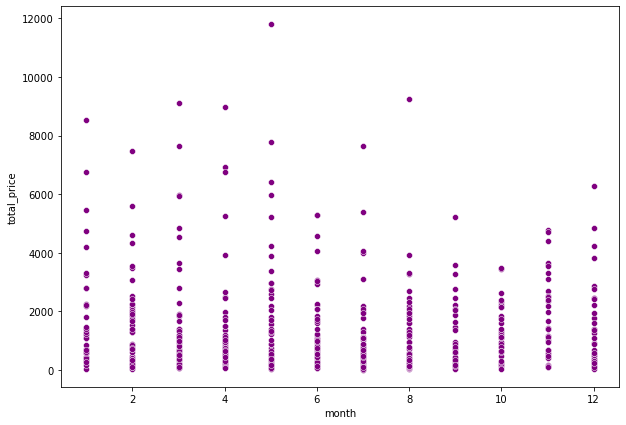

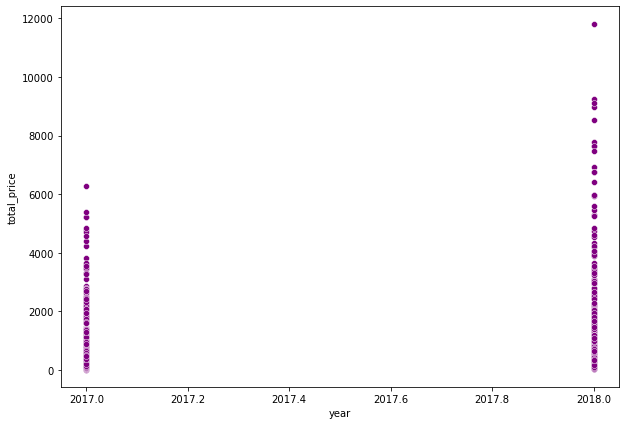

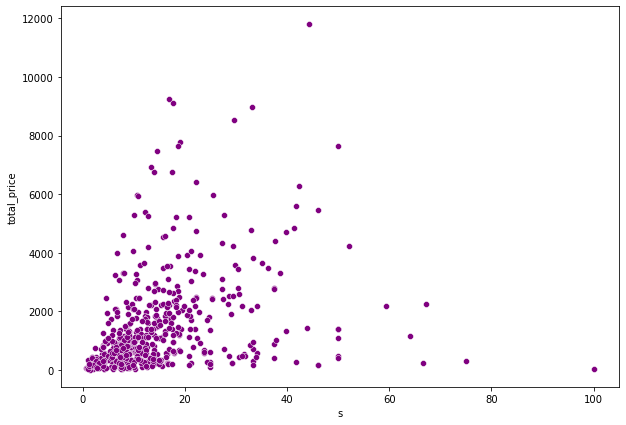

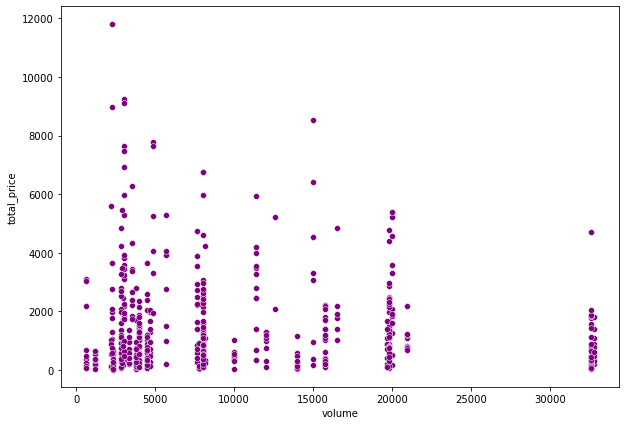

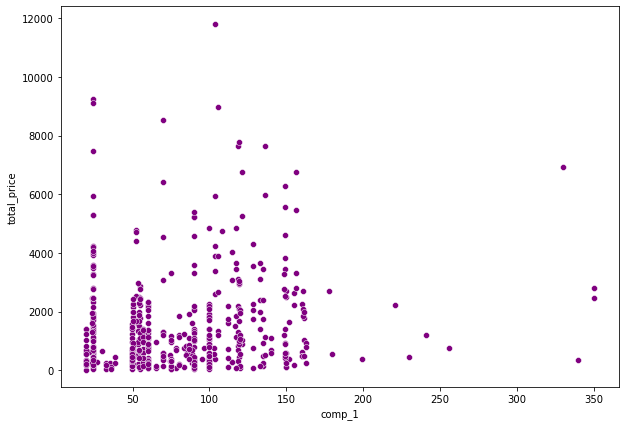

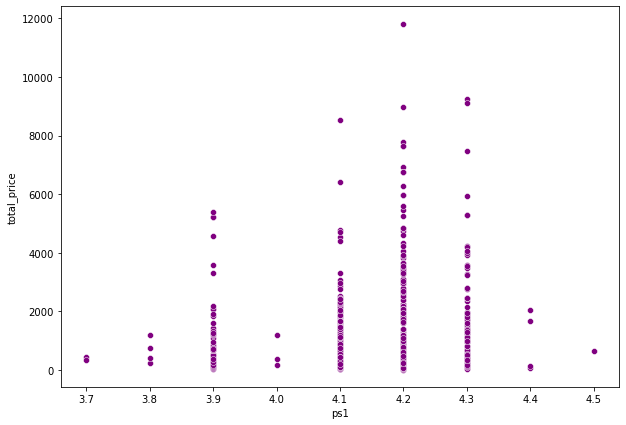

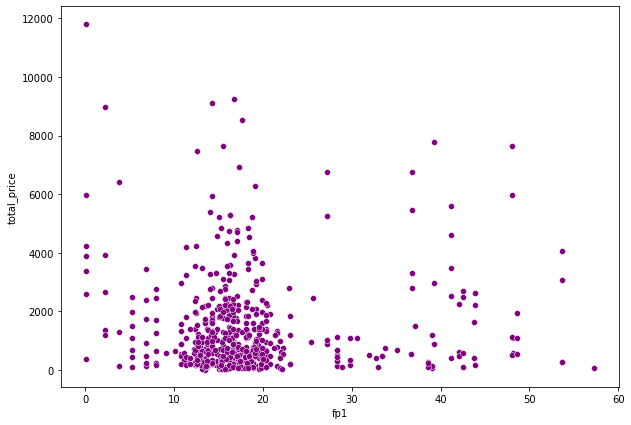

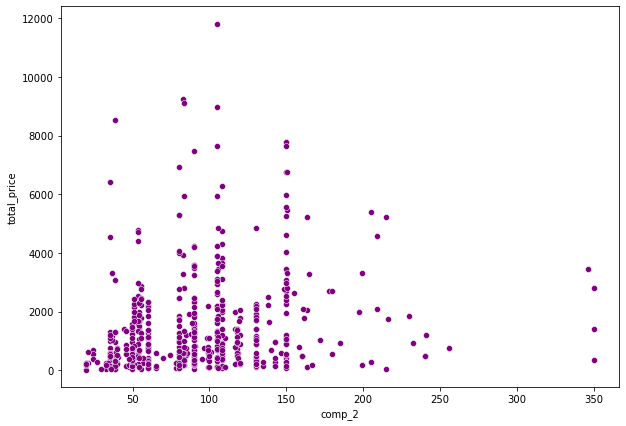

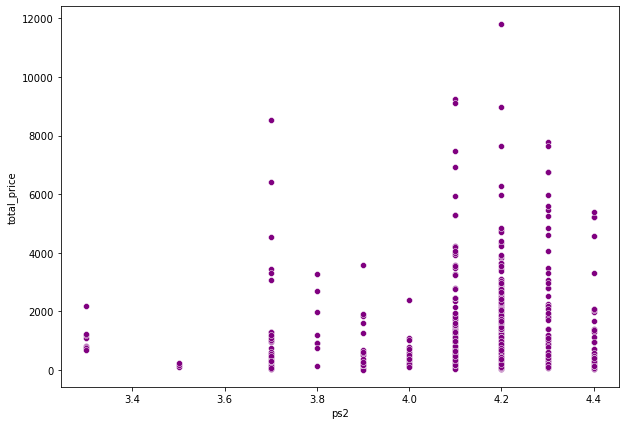

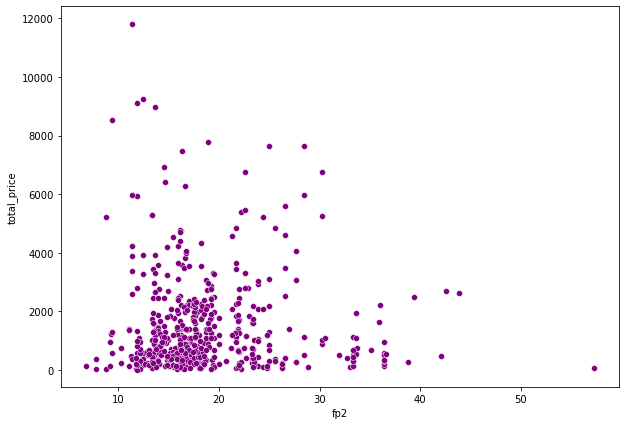

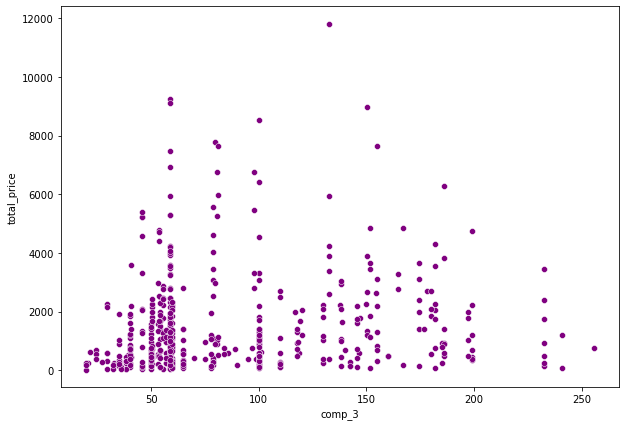

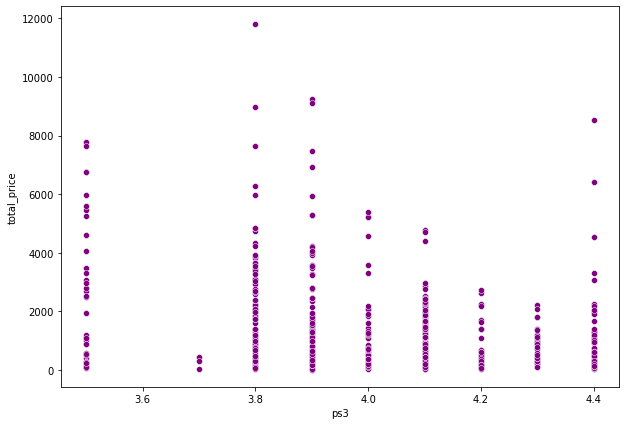

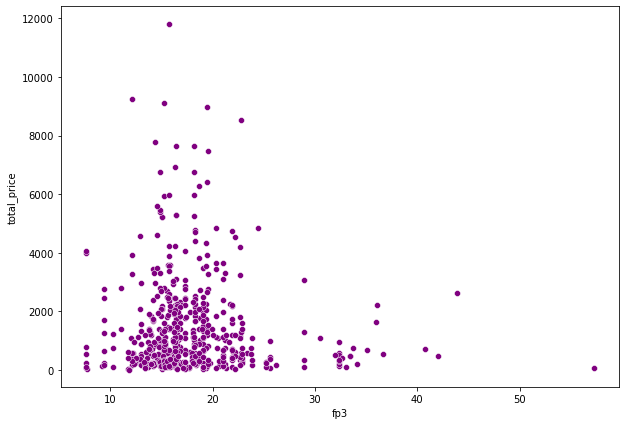

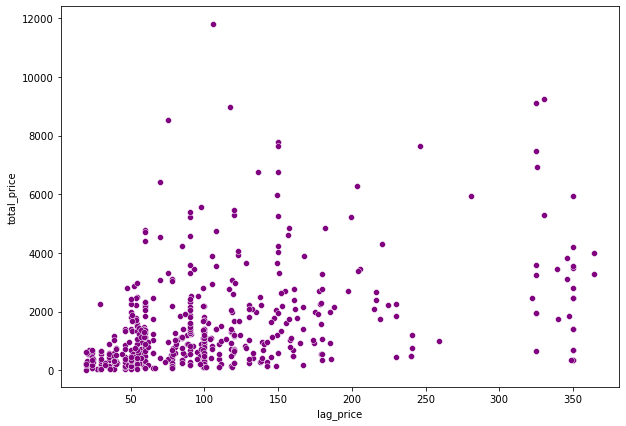

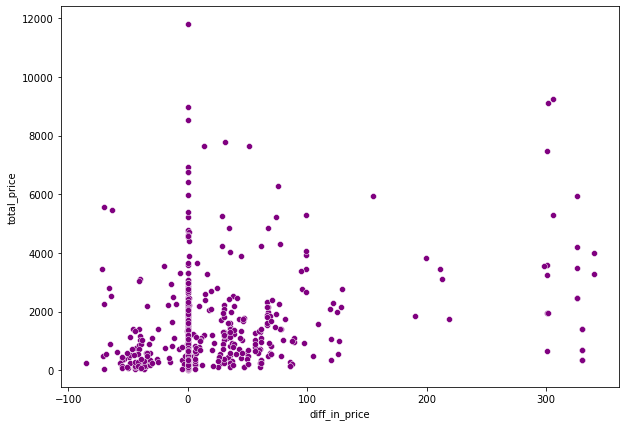

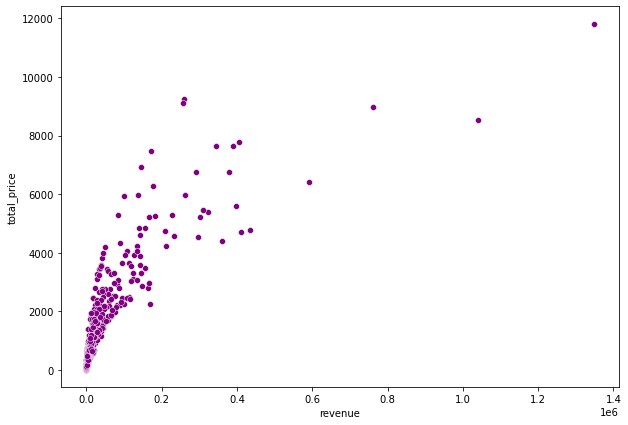

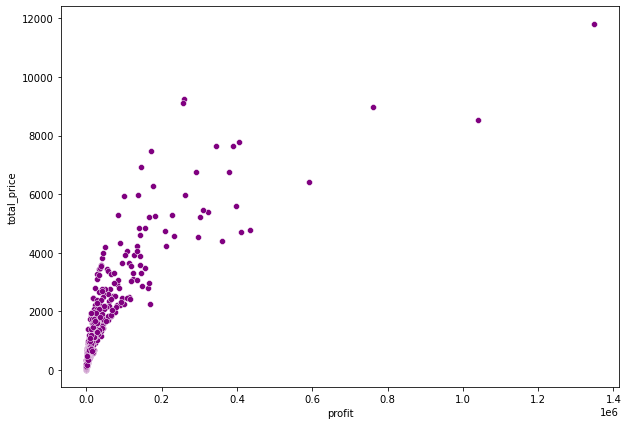

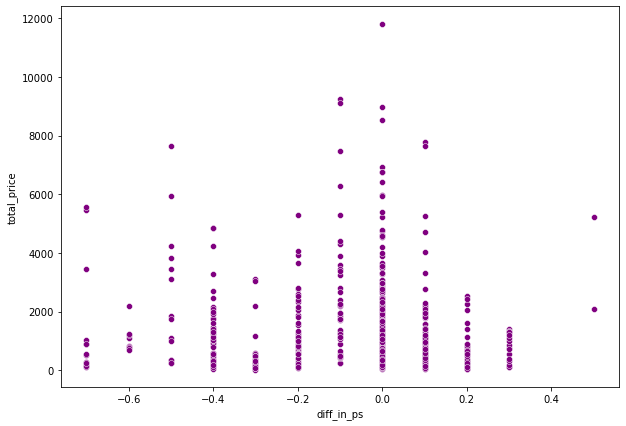

In [22]:
#numerical
for i in num:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=df, x=df[i], y=df['total_price'], color='purple')

In [23]:
#categorical
for i in cat:
    print(df.pivot_table(index=i, values='total_price', aggfunc=np.median))

            total_price
product_id             
bed1            257.820
bed2           1911.800
bed3            948.500
bed4            642.600
bed5           3656.180
computers1      593.400
computers2      711.100
computers3     1931.635
computers4     2664.825
computers5      528.000
computers6     4646.900
consoles1       245.400
consoles2       229.200
cool1           499.945
cool2          1184.905
cool3           135.000
cool4          1837.885
cool5           699.930
furniture1      457.900
furniture2     3187.800
furniture3      230.400
furniture4     1099.500
garden1         679.965
garden10       1292.600
garden2         226.550
garden3         759.920
garden4        1348.600
garden5         712.000
garden6        2093.200
garden7         324.400
garden8        1112.000
garden9        1138.100
health1         339.960
health10        761.880
health2        4427.500
health3        2759.770
health4         328.900
health5        2449.300
health6         974.850
health7         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

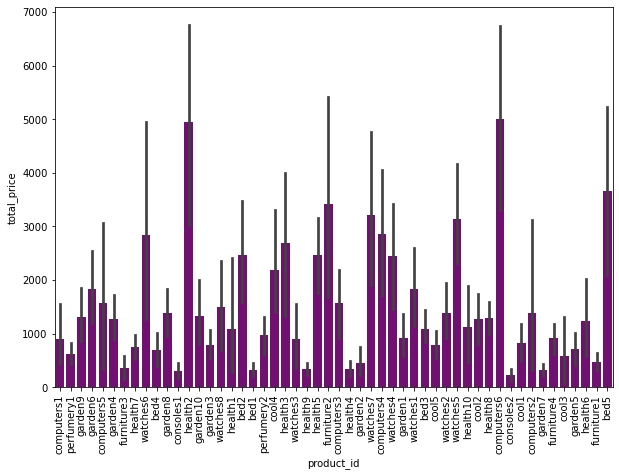

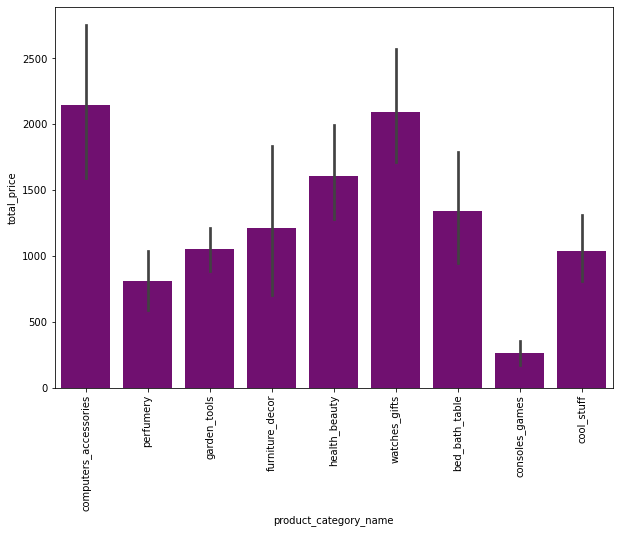

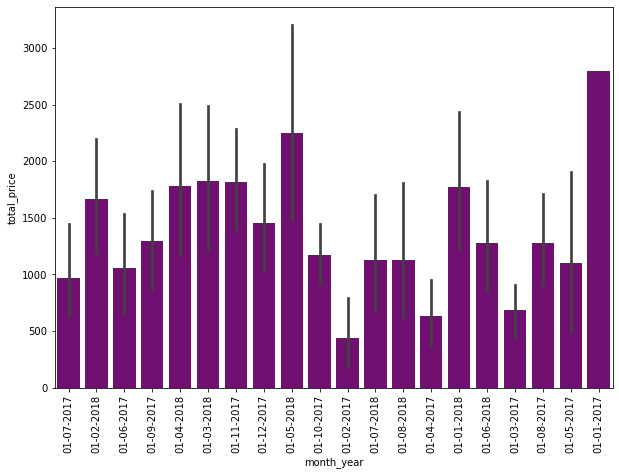

In [24]:
for i in cat:
    plt.figure(figsize=(10,7))
    sns.barplot(data=df, x=i, y='total_price', color='purple')
    plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

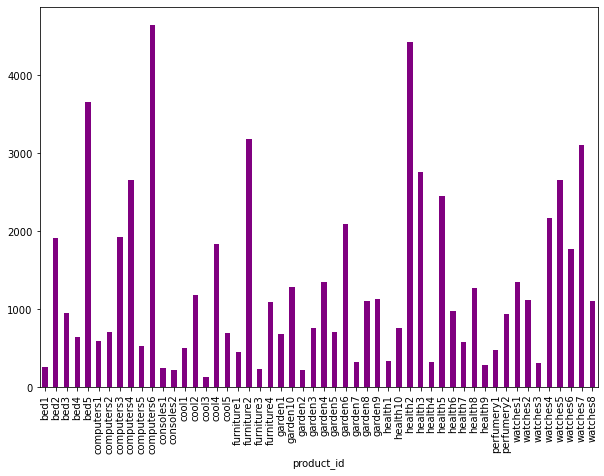

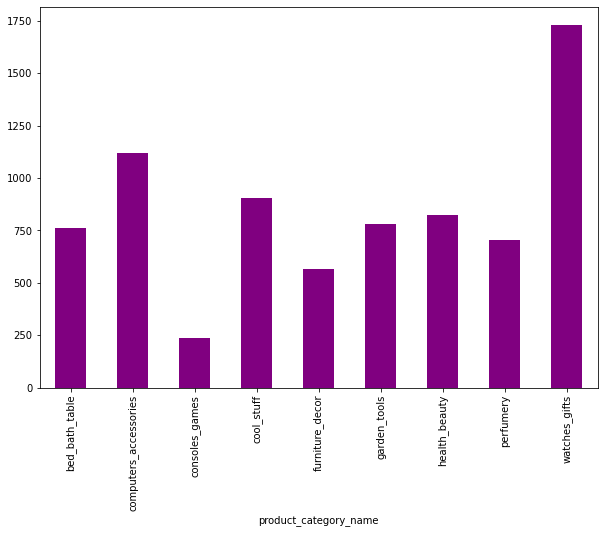

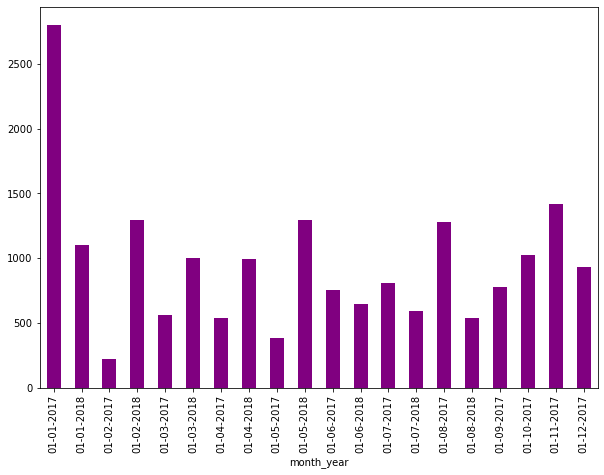

In [25]:
for i in cat:
    plt.figure(figsize=(10,7))

    df.groupby(i)['total_price'].median().plot(kind='bar', color='purple')

### Linearity

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x504 with 0 Axes>

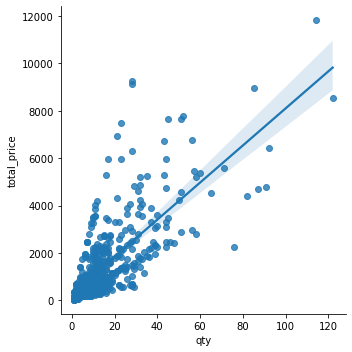

<Figure size 720x504 with 0 Axes>

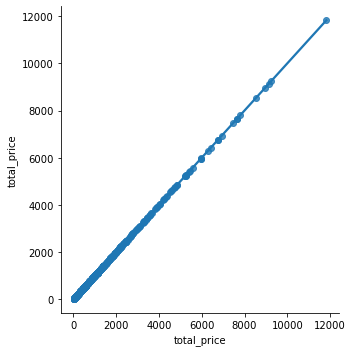

<Figure size 720x504 with 0 Axes>

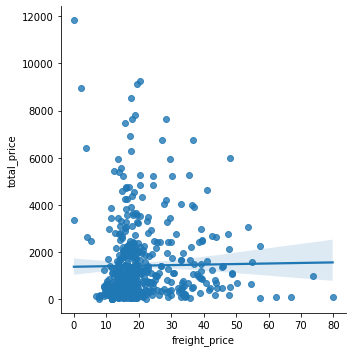

<Figure size 720x504 with 0 Axes>

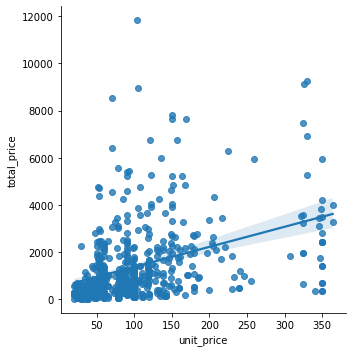

<Figure size 720x504 with 0 Axes>

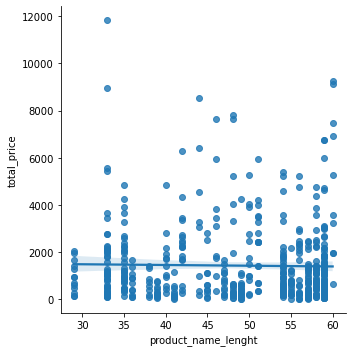

<Figure size 720x504 with 0 Axes>

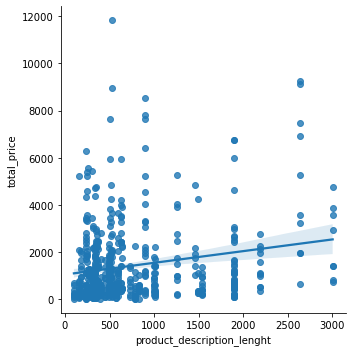

<Figure size 720x504 with 0 Axes>

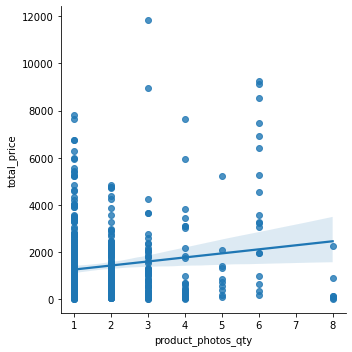

<Figure size 720x504 with 0 Axes>

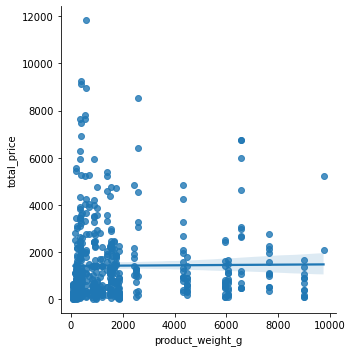

<Figure size 720x504 with 0 Axes>

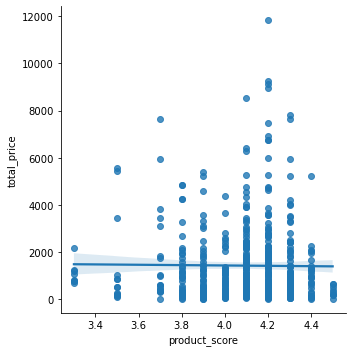

<Figure size 720x504 with 0 Axes>

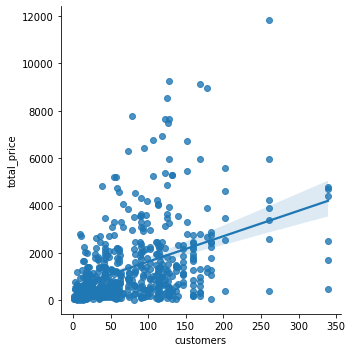

<Figure size 720x504 with 0 Axes>

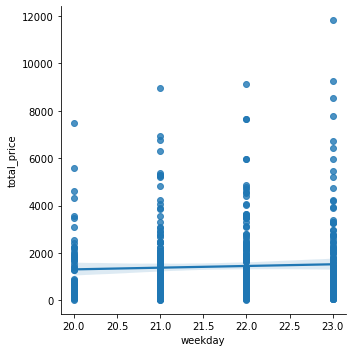

<Figure size 720x504 with 0 Axes>

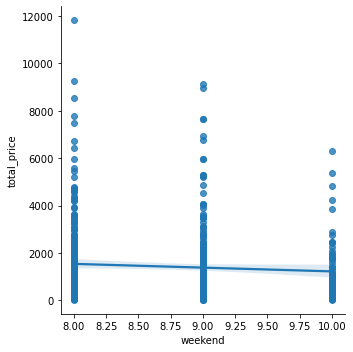

<Figure size 720x504 with 0 Axes>

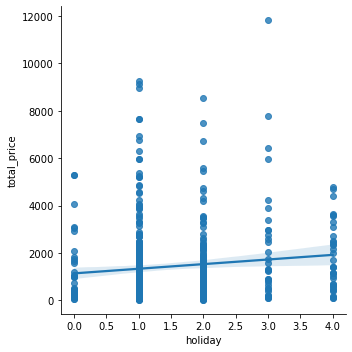

<Figure size 720x504 with 0 Axes>

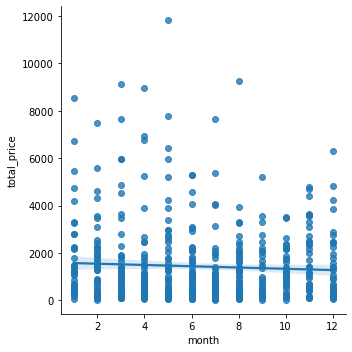

<Figure size 720x504 with 0 Axes>

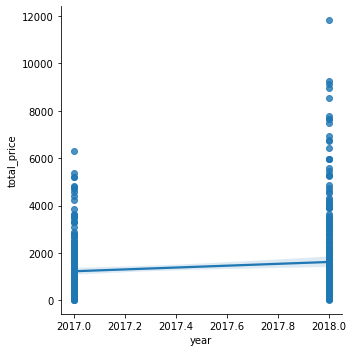

<Figure size 720x504 with 0 Axes>

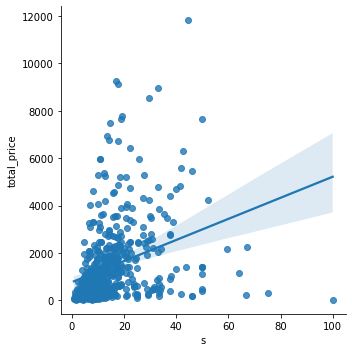

<Figure size 720x504 with 0 Axes>

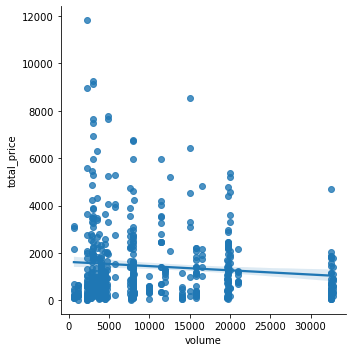

<Figure size 720x504 with 0 Axes>

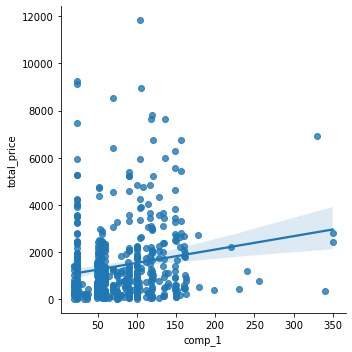

<Figure size 720x504 with 0 Axes>

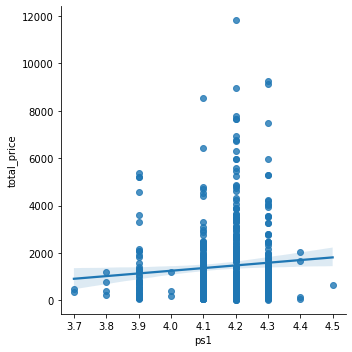

<Figure size 720x504 with 0 Axes>

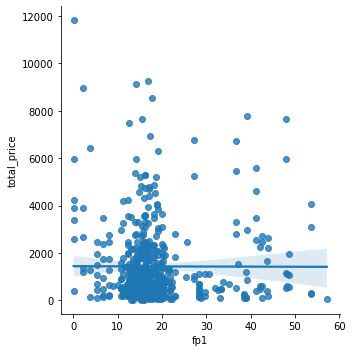

<Figure size 720x504 with 0 Axes>

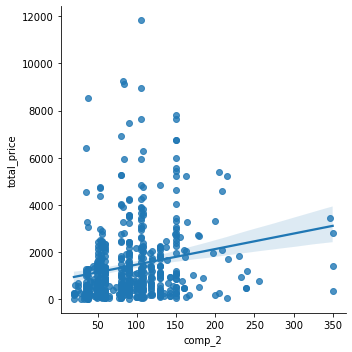

<Figure size 720x504 with 0 Axes>

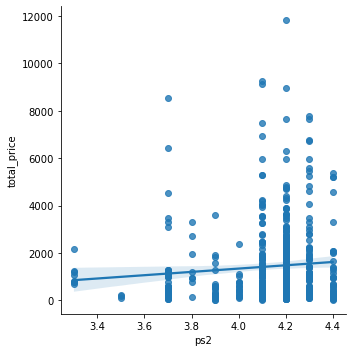

<Figure size 720x504 with 0 Axes>

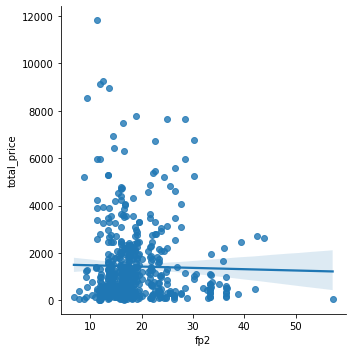

<Figure size 720x504 with 0 Axes>

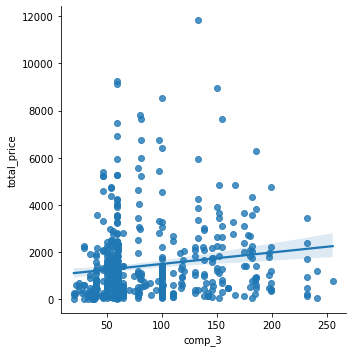

<Figure size 720x504 with 0 Axes>

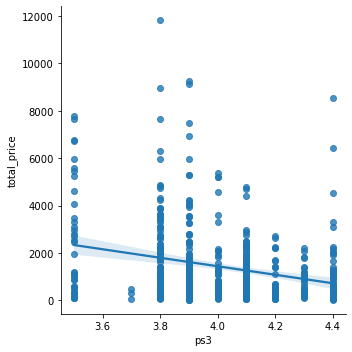

<Figure size 720x504 with 0 Axes>

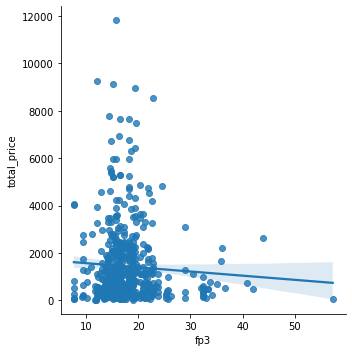

<Figure size 720x504 with 0 Axes>

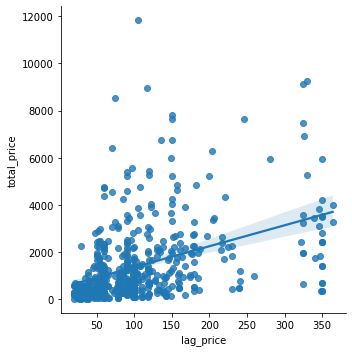

<Figure size 720x504 with 0 Axes>

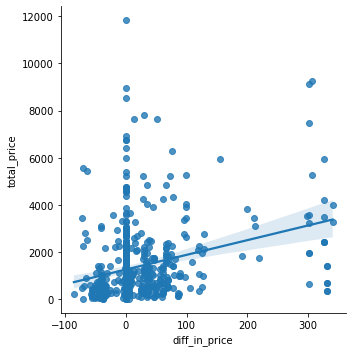

<Figure size 720x504 with 0 Axes>

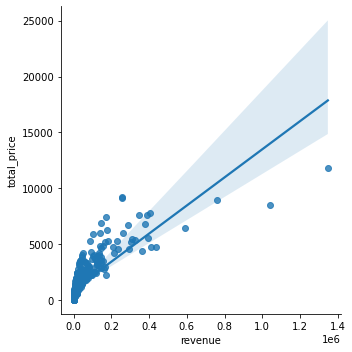

<Figure size 720x504 with 0 Axes>

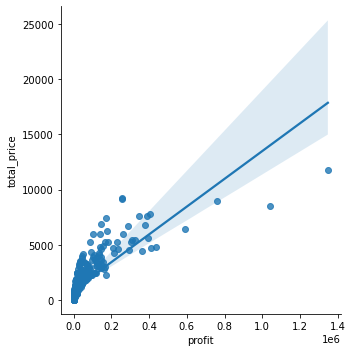

<Figure size 720x504 with 0 Axes>

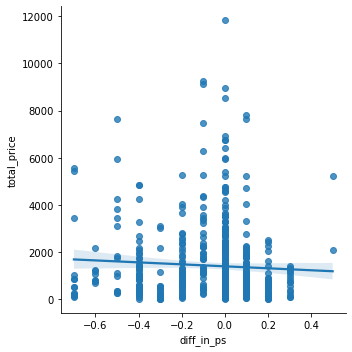

In [26]:
for i in num:
    plt.figure(figsize=(10,7))
    
    sns.lmplot(x=i, y='total_price', data=df, palette='cool')

### Stats

In [27]:
def stats():
    
    skews = []
    kurts = []
    means = []
    medians = []
    type_skewss = []
    column_name = []
    
    for i in num:
        skew = df[i].skew()
        kurt = df[i].kurt()
        mean = df[i].mean()
        median = df[i].median()
        
        if mean>median:
            type_skew = 'left_skewed'
        elif mean==median:
            type_skew = 'normal'
        else:
            type_skew = 'right_skewed'
        
        skews.append(skew)
        kurts.append(kurt)
        means.append(mean)
        medians.append(median)
        type_skewss.append(type_skew)
        column_name.append(i)
        
    return pd.DataFrame({'Feature':column_name,
                         'Skew':skews,
                         'Kurtosis':kurts,
                         'Mean':means,
                         'Median':medians,
                         'Type_of_skew':type_skewss})

stats()

Feature      Skew   Kurtosis          Mean  \
0                          qty  2.717853  10.618643     14.794444   
1                  total_price  2.387011   7.313669   1431.443241   
2                freight_price  1.963811   5.151644     20.585111   
3                   unit_price  1.791931   3.117483    106.549735   
4          product_name_lenght -0.554834  -1.112382     48.781481   
5   product_description_lenght  1.603071   1.918503    759.685185   
6           product_photos_qty  1.982587   4.267294      1.972222   
7             product_weight_g  1.805048   2.361995   1802.418519   
8                product_score -1.056965   1.349201      4.093704   
9                    customers  1.267741   2.658697     81.179630   
10                     weekday -0.209204  -1.025734     21.753704   
11                     weekend  0.561696  -0.863826      8.674074   
12                     holiday  1.133677   1.057063      1.509259   
13                       month  0.133793  -1.052602      6.229630   
14                        year -0.096677  -1.998068   2017.524074   
15                           s  2.309820   8.323925     14.869500   
16                      volume  1.164884   0.345398  10685.075926   
17                      comp_1  1.523888   5.112190     79.635017   
18                         ps1 -0.926756   1.035970      4.163148   
19                         fp1  1.688434   3.551909     18.545233   
20                      comp_2  1.598514   5.190132     93.070972   
21                         ps2 -1.740466   3.732644      4.132778   
22                         fp2  1.678961   4.084507     18.554352   
23                      comp_3  1.253932   0.755120     85.073073   
24                         ps3 -0.155473  -0.245142      4.003519   
25                         fp3  2.241167   9.658046     17.752851   
26                   lag_price  1.753594   2.943946    107.362268   
27               diff_in_price  2.621664   7.579801     26.914717   
28                     revenue  6.860640  65.053913  40606.592389   
29                      profit  6.860707  65.055015  40586.007278   
30                  diff_in_ps -0.895972   0.608132     -0.069444   

         Median  Type_of_skew  
0     10.000000   left_skewed  
1    880.000000   left_skewed  
2     17.494354   left_skewed  
3     89.900000   left_skewed  
4     51.000000  right_skewed  
5    501.000000   left_skewed  
6      2.000000  right_skewed  
7    922.000000   left_skewed  
8      4.100000  right_skewed  
9     66.000000   left_skewed  
10    22.000000  right_skewed  
11     9.000000  right_skewed  
12     1.000000   left_skewed  
13     6.000000   left_skewed  
14  2018.000000  right_skewed  
15    11.543425   left_skewed  
16  8000.000000   left_skewed  
17    69.900000   left_skewed  
18     4.200000  right_skewed  
19    16.611538   left_skewed  
20    89.990000   left_skewed  
21     4.200000  right_skewed  
22    16.811765   left_skewed  
23    59.900000   left_skewed  
24     4.000000   left_skewed  
25    16.505128   left_skewed  
26    89.990000   left_skewed  
27     0.000000   left_skewed  
28  9666.750000   left_skewed  
29  9651.024394   left_skewed  
30     0.000000  right_skewed

### Correlation

<IPython.core.display.Javascript object>

<AxesSubplot:>

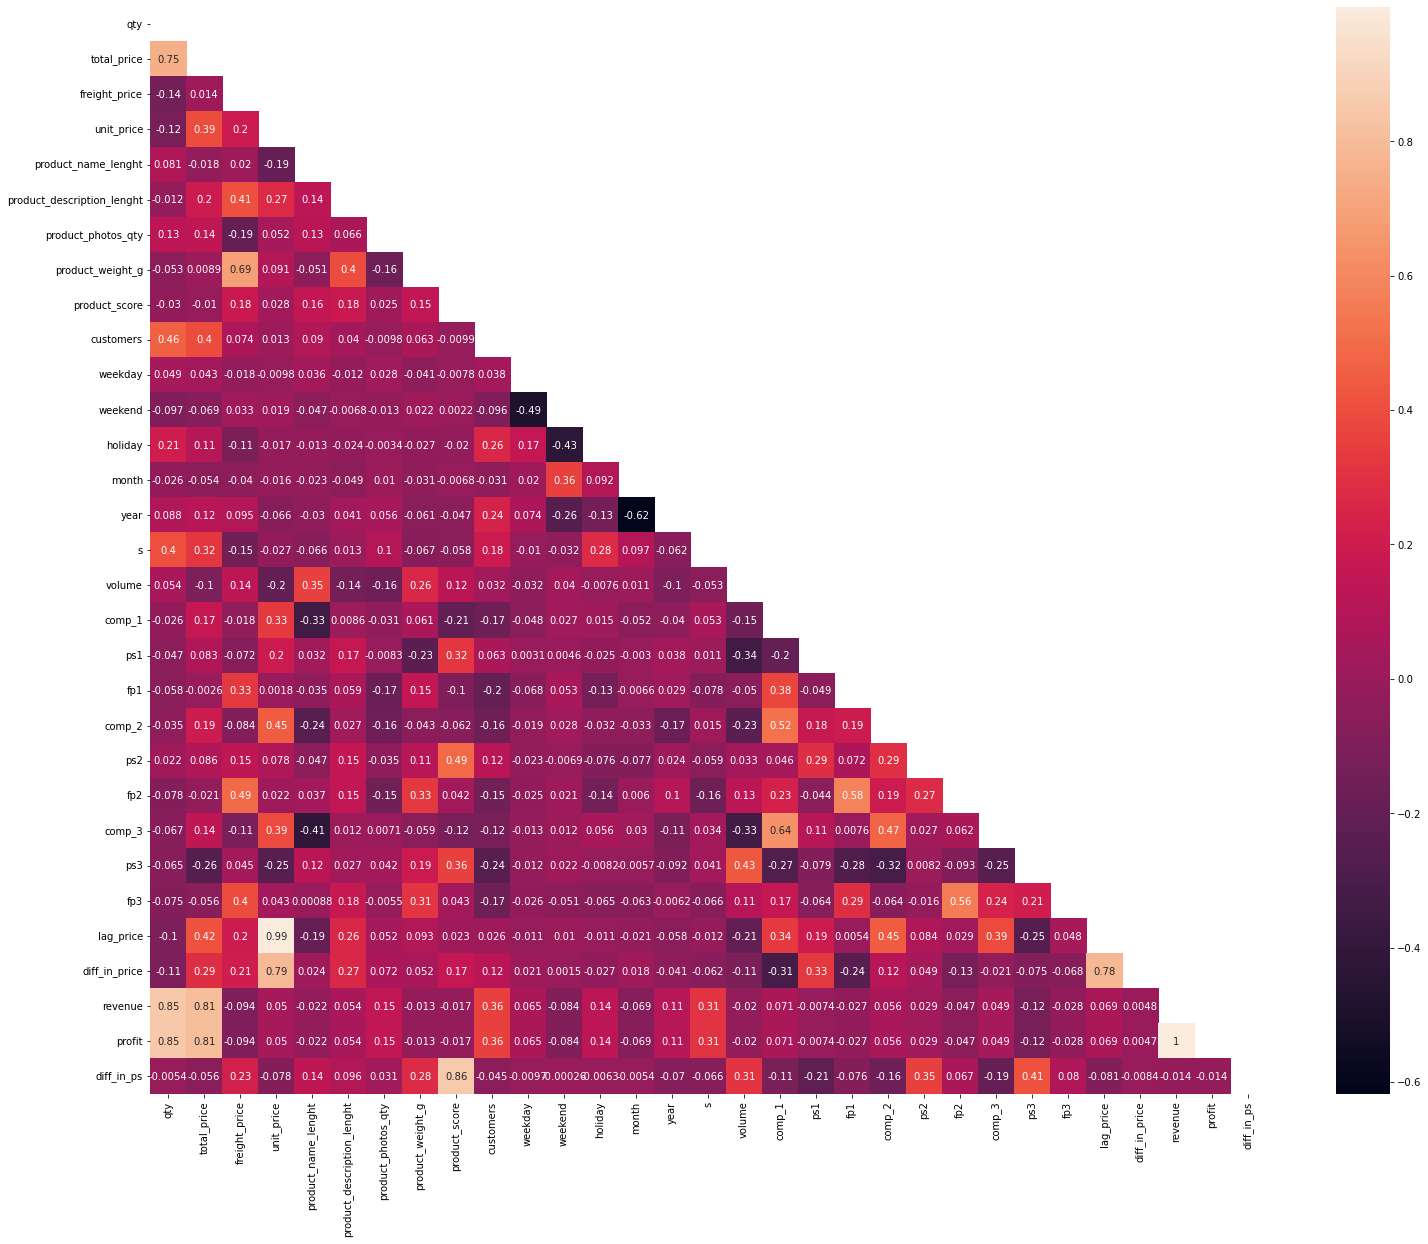

In [28]:
plt.figure(figsize=(25, 20))

sns.heatmap(df.corr(), mask = np.triu(df.corr()), annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

<Figure size 1296x720 with 0 Axes>

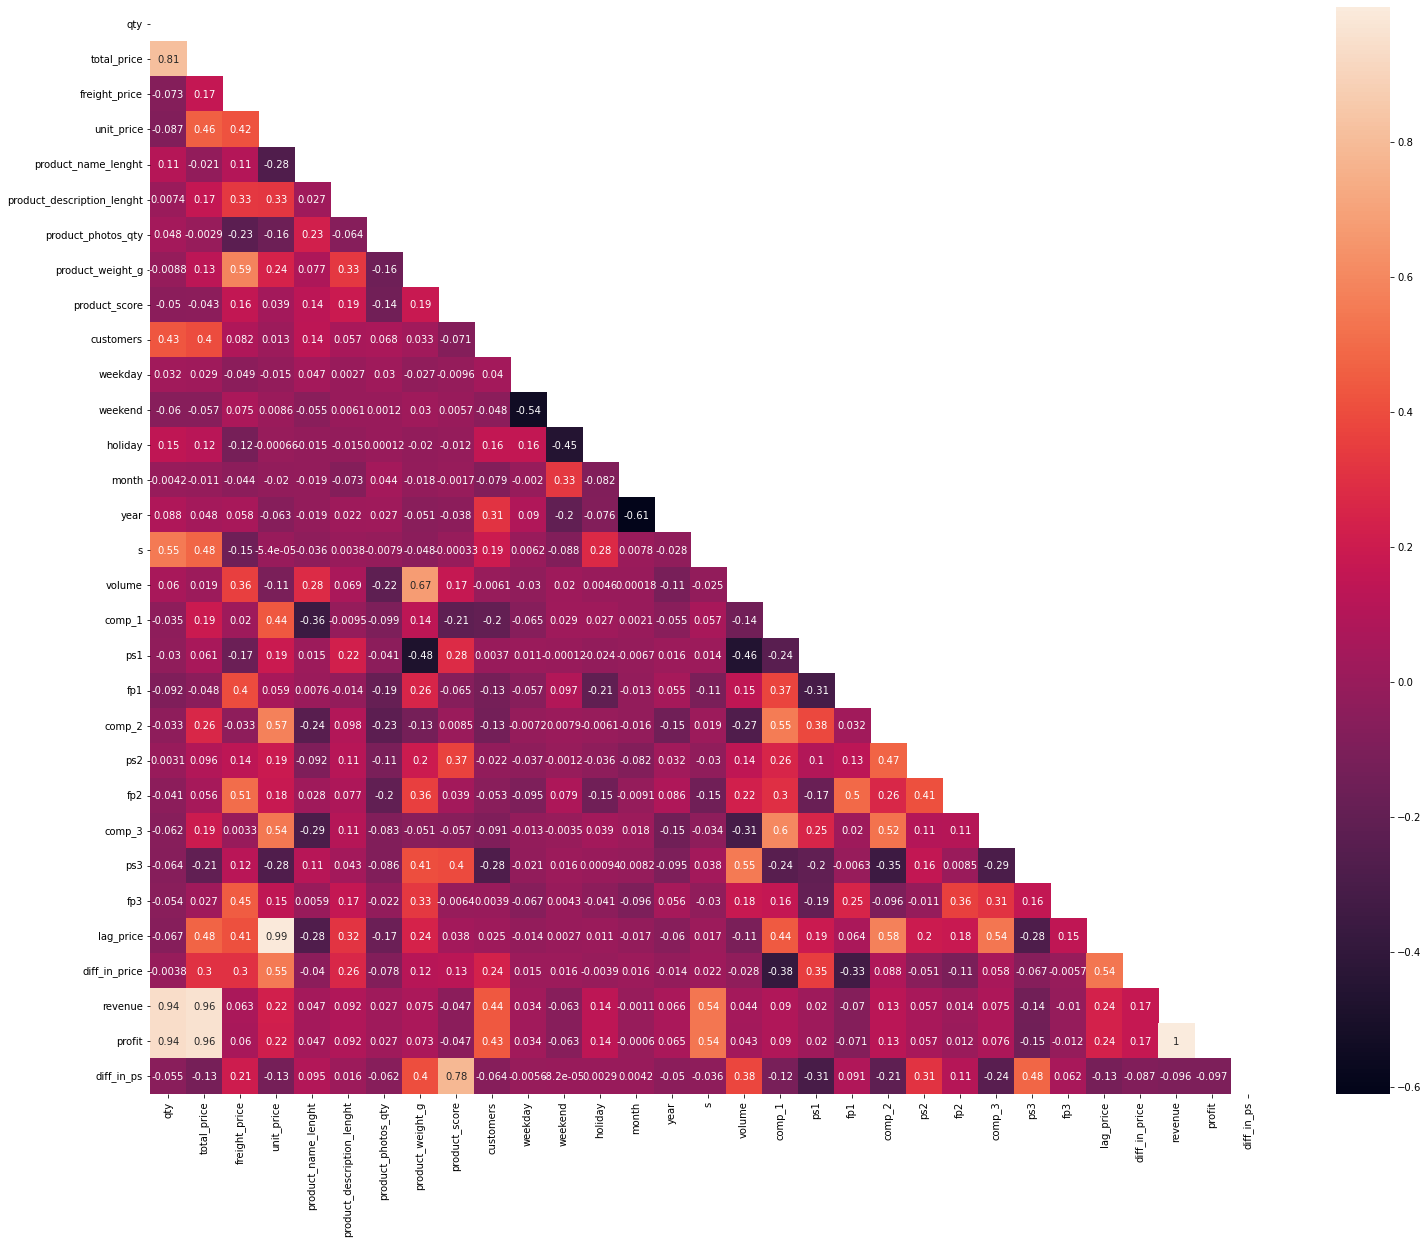

In [29]:
plt.figure(figsize=(18, 10))
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(method='spearman'), mask = np.triu(df.corr(method='spearman')), annot=True)

### Normality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

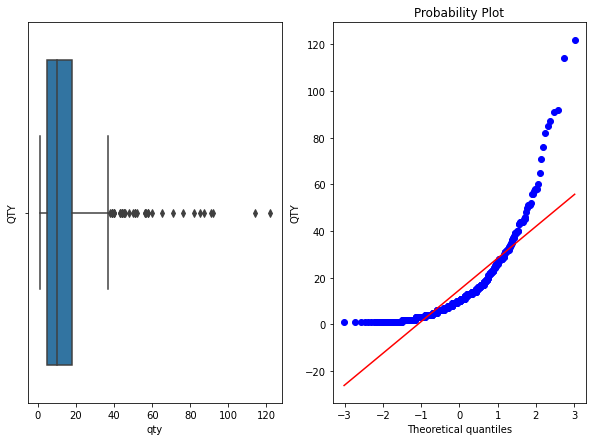

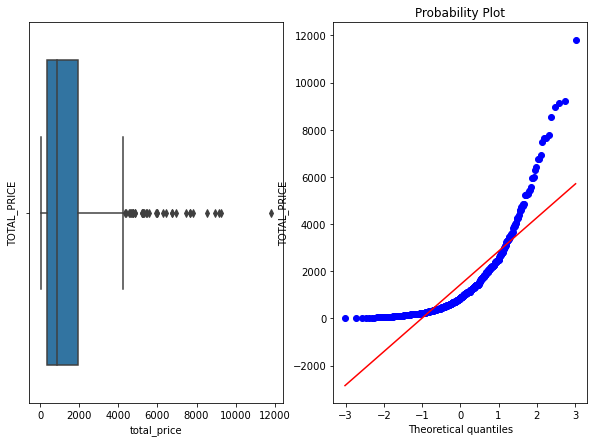

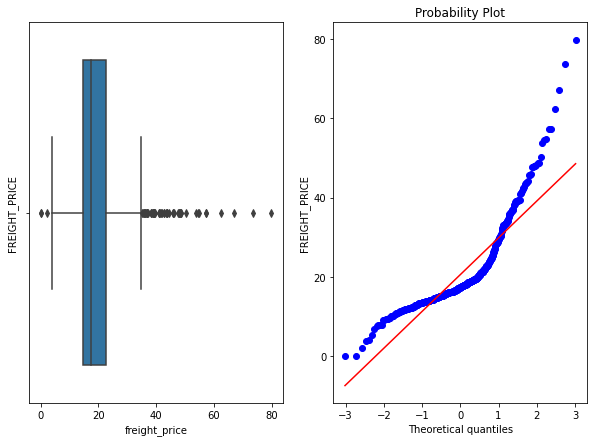

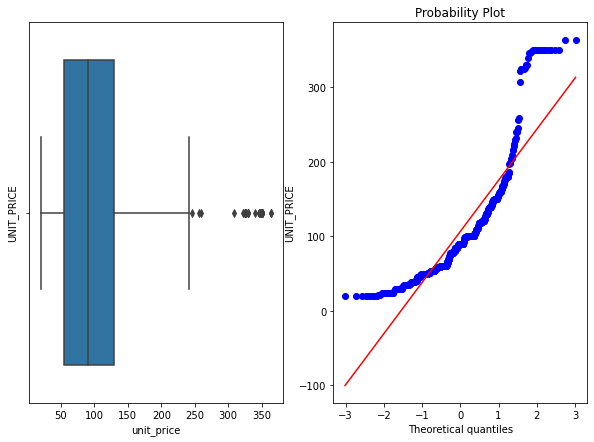

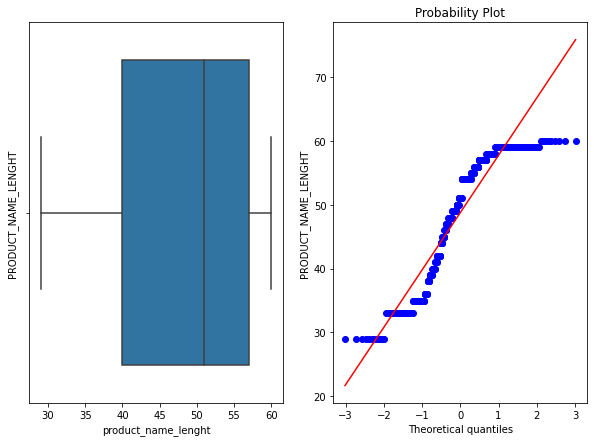

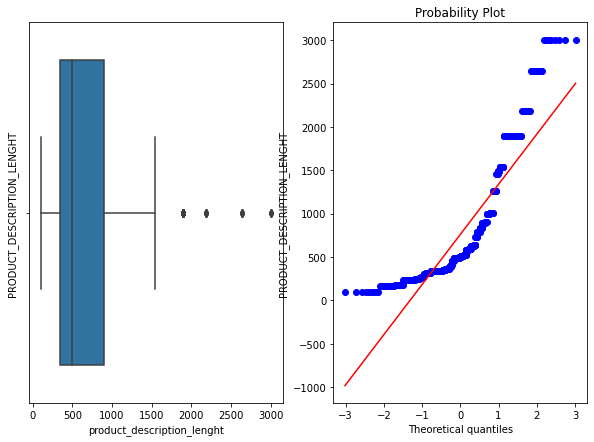

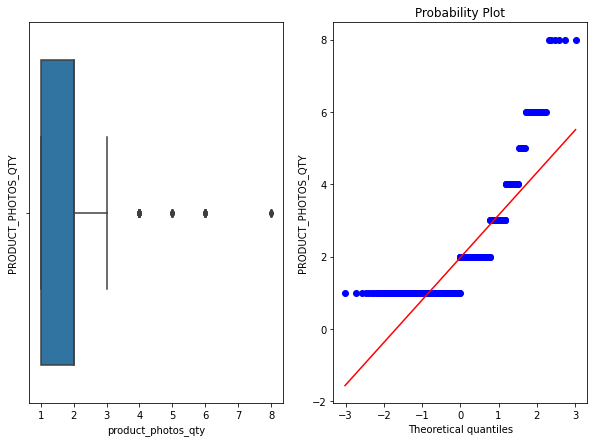

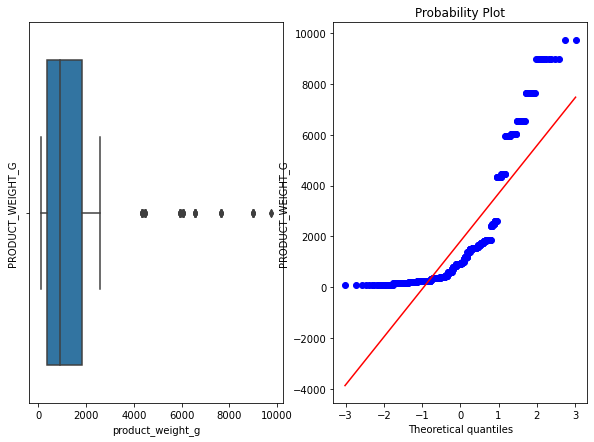

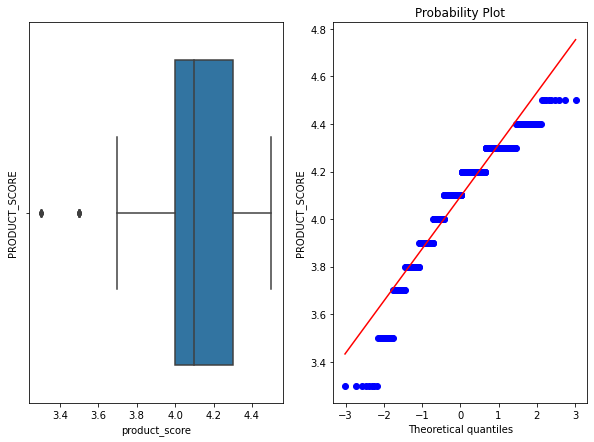

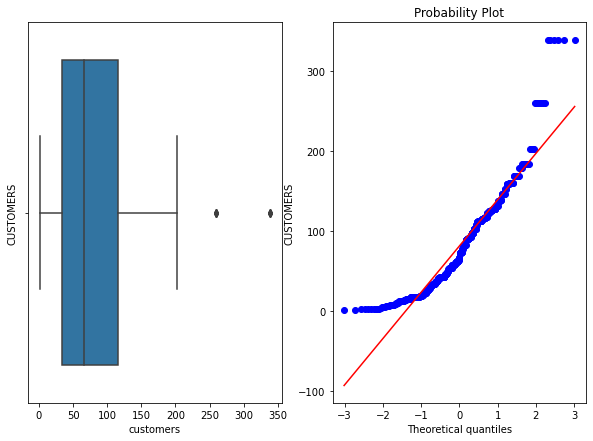

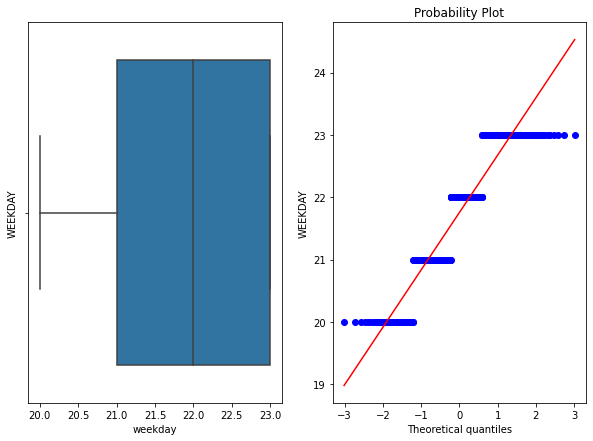

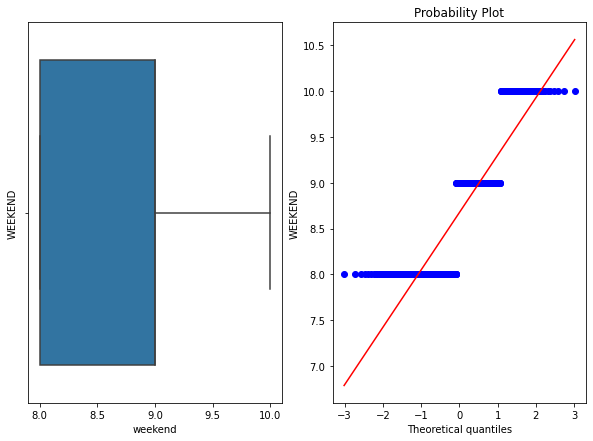

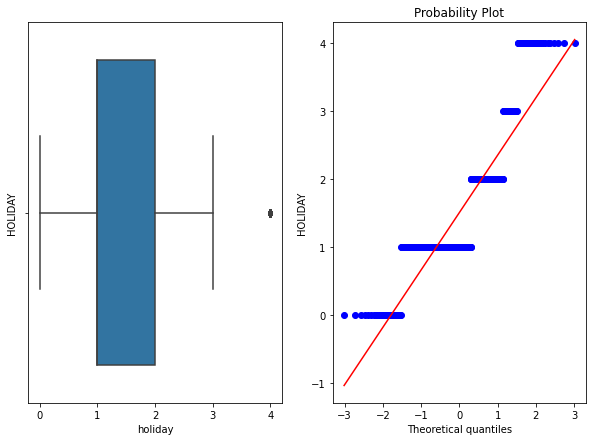

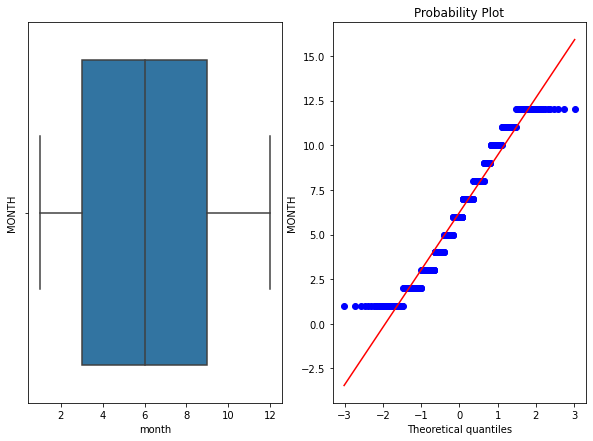

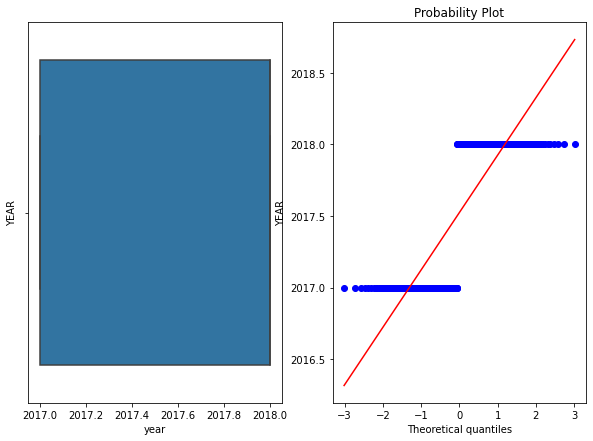

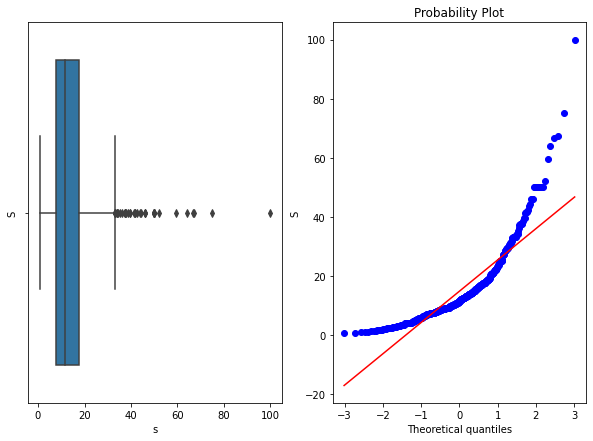

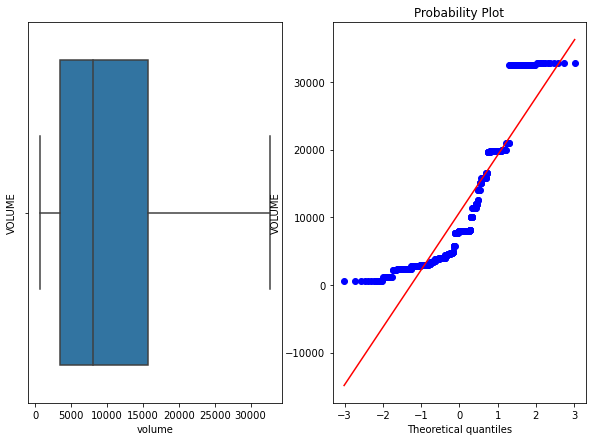

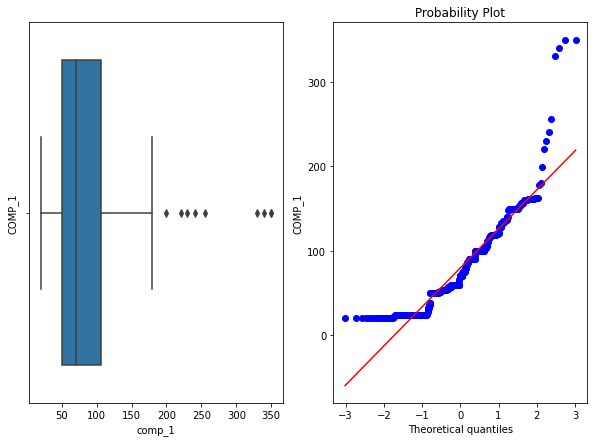

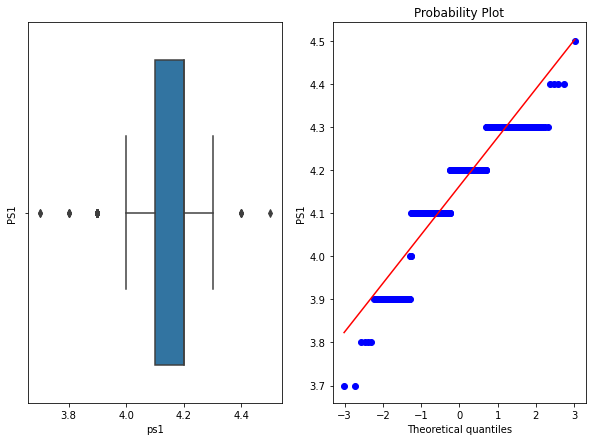

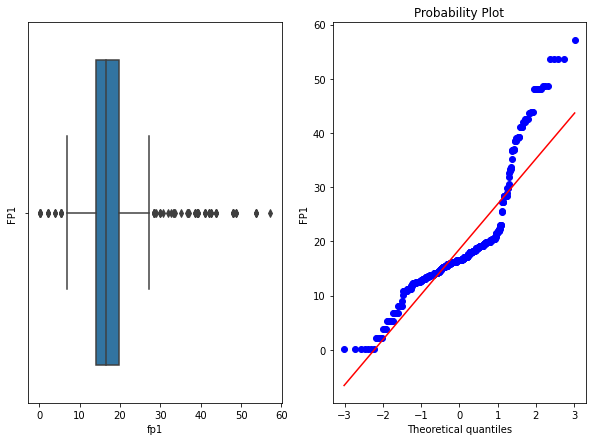

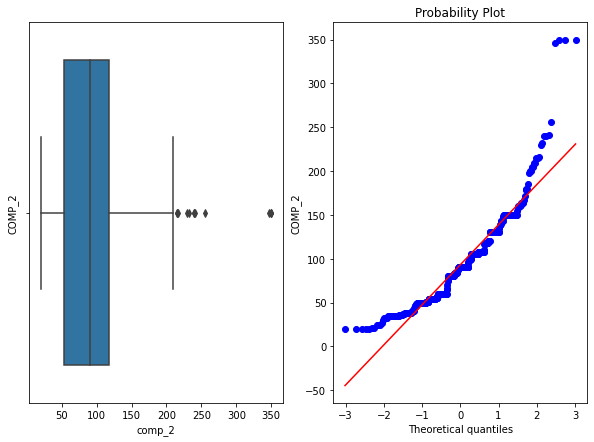

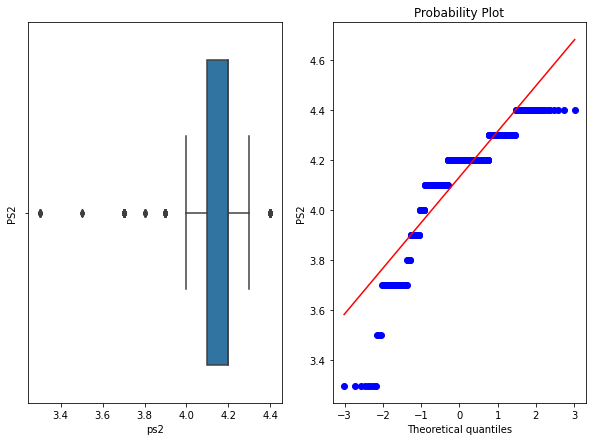

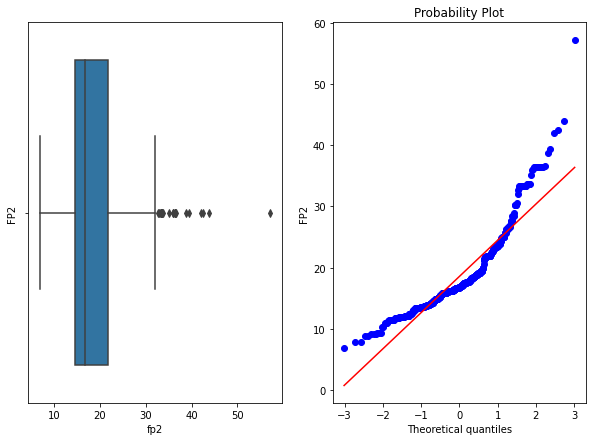

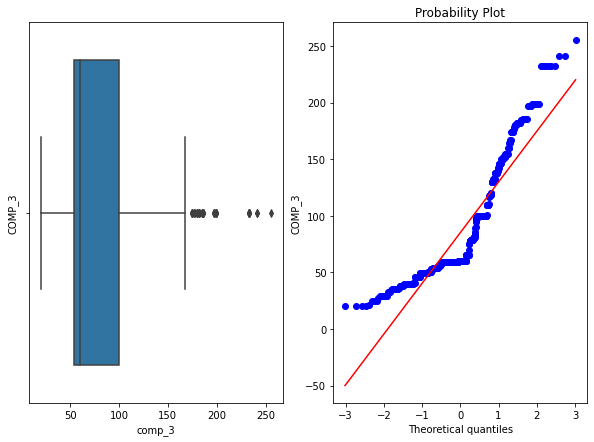

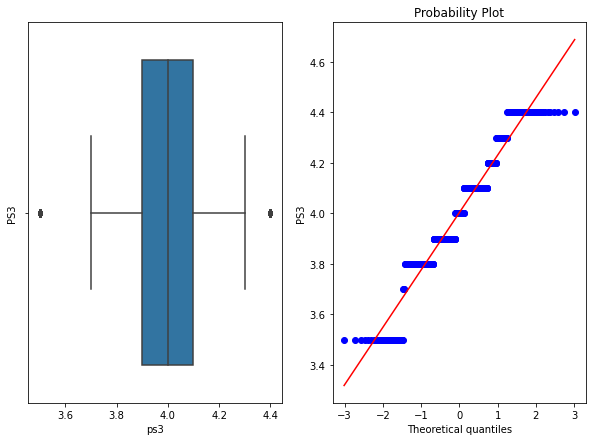

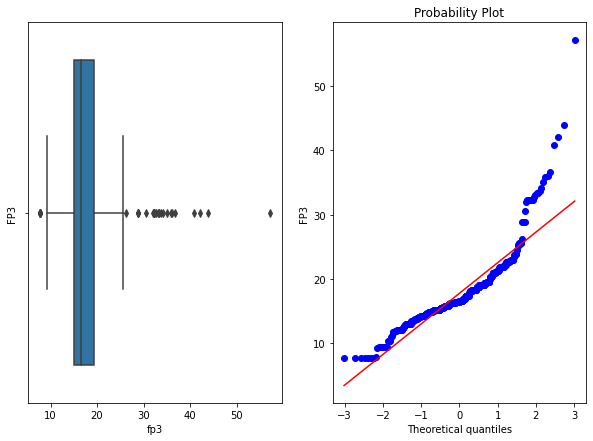

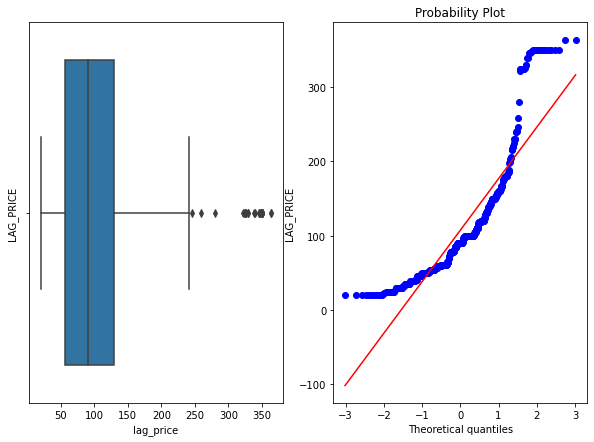

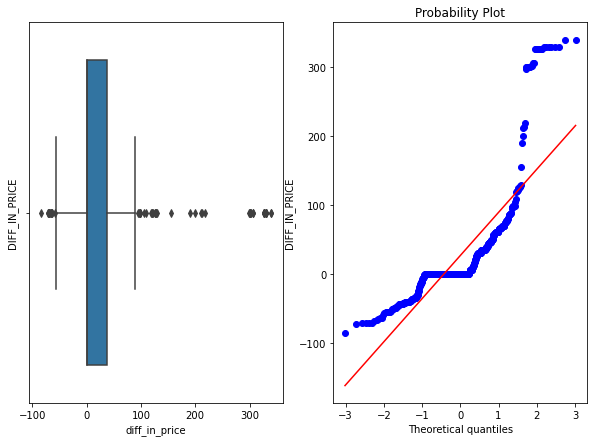

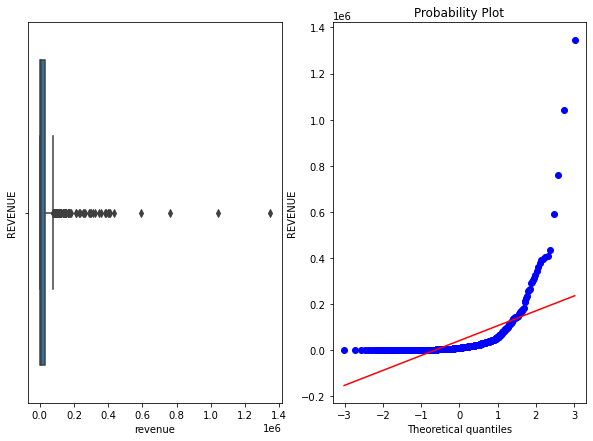

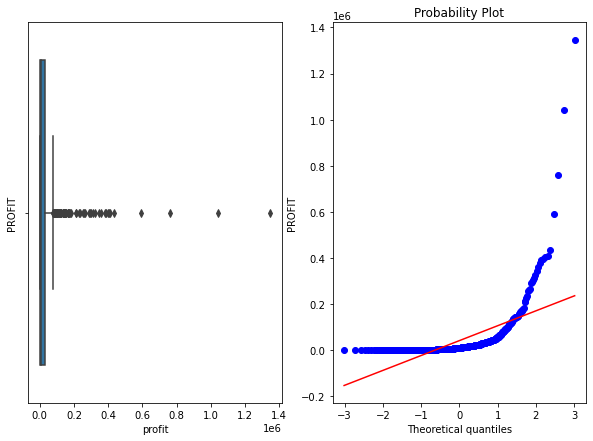

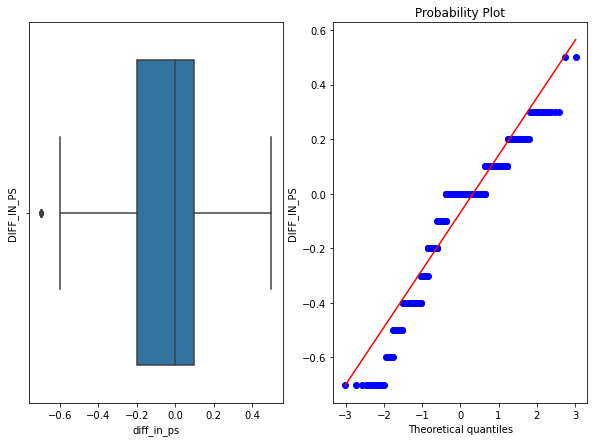

In [30]:
def normlity_vis():
    for i in num:
        plt.figure(figsize=(10,7))
        
        plt.subplot(121)
        sns.boxplot(x = df[i])
        plt.ylabel(i.upper())
        
        plt.subplot(122)
        scipy.stats.probplot(df[i], plot=plt, dist='norm')
        plt.ylabel(i.upper())
normlity_vis()     

In [31]:
#shapiro wilk
for i in num:
    pvalue = scipy.stats.shapiro(df[i])[1]
    
    print(i.upper())
    if pvalue<0.05:
        print('We reject the Ho. Data is not normal')
        
    else:
        print('We accept the Ho. Data is normal')
    print()

QTY
We reject the Ho. Data is not normal

TOTAL_PRICE
We reject the Ho. Data is not normal

FREIGHT_PRICE
We reject the Ho. Data is not normal

UNIT_PRICE
We reject the Ho. Data is not normal

PRODUCT_NAME_LENGHT
We reject the Ho. Data is not normal

PRODUCT_DESCRIPTION_LENGHT
We reject the Ho. Data is not normal

PRODUCT_PHOTOS_QTY
We reject the Ho. Data is not normal

PRODUCT_WEIGHT_G
We reject the Ho. Data is not normal

PRODUCT_SCORE
We reject the Ho. Data is not normal

CUSTOMERS
We reject the Ho. Data is not normal

WEEKDAY
We reject the Ho. Data is not normal

WEEKEND
We reject the Ho. Data is not normal

HOLIDAY
We reject the Ho. Data is not normal

MONTH
We reject the Ho. Data is not normal

YEAR
We reject the Ho. Data is not normal

S
We reject the Ho. Data is not normal

VOLUME
We reject the Ho. Data is not normal

COMP_1
We reject the Ho. Data is not normal

PS1
We reject the Ho. Data is not normal

FP1
We reject the Ho. Data is not normal

COMP_2
We reject the Ho. Data is 

### Outliers

In [34]:
def outliers():
    outlierss = []
    names = []
    for i in num:
        Q3 = df[i].quantile(0.75)
        Q1 = df[i].quantile(0.25)
        IQR = Q3 -Q1
        upper_limit = Q3 + 1.5*IQR
        lower_limit = Q1 - 1.5*IQR

        outliers = np.where(df[i]>upper_limit, True, np.where(df[i]<lower_limit, True, False))
        outlierss.append(len(outliers))
        names.append(i)
        
        outlier_dataframe = pd.DataFrame(columns=['Features', 'Number of Outliers'])
        outlier_dataframe['Features'] = names
        outlier_dataframe['Number of Outliers'] = outlierss
        
    return outlier_dataframe
    
outliers()

Features  Number of Outliers
0                          qty                 540
1                  total_price                 540
2                freight_price                 540
3                   unit_price                 540
4          product_name_lenght                 540
5   product_description_lenght                 540
6           product_photos_qty                 540
7             product_weight_g                 540
8                product_score                 540
9                    customers                 540
10                     weekday                 540
11                     weekend                 540
12                     holiday                 540
13                       month                 540
14                        year                 540
15                           s                 540
16                      volume                 540
17                      comp_1                 540
18                         ps1                 540
19                         fp1                 540
20                      comp_2                 540
21                         ps2                 540
22                         fp2                 540
23                      comp_3                 540
24                         ps3                 540
25                         fp3                 540
26                   lag_price                 540
27               diff_in_price                 540
28                     revenue                 540
29                      profit                 540
30                  diff_in_ps                 540

### Feature Range

In [35]:
for i in num:
    diff = df[i].max() - df[i].min()
    print(f'{i}:',diff)

qty: 121
total_price: 11800.300000000001
freight_price: 79.76
unit_price: 344.1
product_name_lenght: 31
product_description_lenght: 2906
product_photos_qty: 7
product_weight_g: 9650
product_score: 1.2000000000000002
customers: 338
weekday: 3
weekend: 2
holiday: 4
month: 11
year: 1
s: 99.28057554
volume: 32096
comp_1: 330.0
ps1: 0.7999999999999998
fp1: 57.134561403999996
comp_2: 330.0
ps2: 1.1000000000000005
fp2: 50.419999999999995
comp_3: 235.71
ps3: 0.9000000000000004
fp3: 49.559999999999995
lag_price: 344.15
diff_in_price: 425.01
revenue: 1347482.9000000001
profit: 1347494.934561404
diff_in_ps: 1.2000000000000006


### Feature selection

In [51]:
whole_data = [train, test]

#### Dropping unnecessary columns

In [64]:
train = train.drop(['product_id', 'month_year', 'comp_2','ps2','fp2','comp_3','ps3','fp3'],axis=1)
test = test.drop(['product_id', 'month_year', 'comp_2','ps2','fp2','comp_3','ps3','fp3'],axis=1)

#### Feature Engineering

In [75]:
xtrain = train.drop(['total_price'], axis=1)
ytrain = train['total_price']

xtest =  test.drop(['total_price'], axis=1)
ytest =  test['total_price']

In [76]:
num = xtrain.select_dtypes('number').columns
cat = xtrain.select_dtypes('O')

In [77]:
scaler = StandardScaler()
encoder = OneHotEncoder()
label_encoder = LabelEncoder()

In [81]:
xtrain[num] = scaler.fit_transform(xtrain[num])
xtest[num] = scaler.transform(xtest[num])

for i in cat:
    xtrain[i] = label_encoder.fit_transform(xtrain[i])
    xtest[i] = label_encoder.transform(xtest[i])

In [82]:
xtest.shape, xtrain.shape

((136, 25), (540, 25))

#### Feature Selection with lasso

In [83]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [84]:
lasso_feature_selection = SelectFromModel(Lasso())
lasso_feature_selection.fit(xtrain, ytrain)

SelectFromModel(estimator=Lasso())

In [107]:
print(len(xtrain.columns[lasso_feature_selection.get_support()]))
lasso_selected_features = xtrain.columns[lasso_feature_selection.get_support()].to_list()
lasso_selected_features

22


['product_category_name',
 'qty',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'ps1',
 'fp1',
 'lag_price',
 'diff_in_price',
 'revenue',
 'diff_in_ps']

#### Feature Selection with Recursive Feature elimination

In [91]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [92]:
rfe = RFE(DecisionTreeRegressor(), n_features_to_select=22)
rfe.fit(xtrain, ytrain)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=22)

In [106]:
print(len(xtrain.columns[rfe.support_]))
rfe_selected_features = xtrain.columns[rfe.support_].to_list()
rfe_selected_features

22


['qty',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'fp1',
 'lag_price',
 'diff_in_price',
 'revenue',
 'profit',
 'diff_in_ps']

#### Feature selection with f_regression

In [97]:
from sklearn.feature_selection import f_regression

In [99]:
f_regression_values = f_regression(xtrain, ytrain)[1]

In [100]:
fregress = pd.DataFrame({'Features':xtrain.columns,
             'Pvalues':f_regression_values})
fregress

Features        Pvalues
0        product_category_name   1.588368e-01
1                          qty  7.705367e-100
2                freight_price   7.381591e-01
3                   unit_price   1.366290e-21
4          product_name_lenght   6.771187e-01
5   product_description_lenght   4.652370e-06
6           product_photos_qty   7.469197e-04
7             product_weight_g   8.373127e-01
8                product_score   8.099345e-01
9                    customers   8.423194e-22
10                     weekday   3.192453e-01
11                     weekend   1.112060e-01
12                     holiday   8.991437e-03
13                       month   2.132281e-01
14                        year   5.344539e-03
15                           s   2.657008e-14
16                      volume   1.899572e-02
17                      comp_1   7.546743e-05
18                         ps1   5.326358e-02
19                         fp1   9.520275e-01
20                   lag_price   6.095101e-24
21               diff_in_price   9.436167e-12
22                     revenue  4.318937e-125
23                      profit  4.366466e-125
24                  diff_in_ps   1.921938e-01

In [105]:
fregression_selected_features = fregress[fregress['Pvalues']<0.05]['Features'].to_list()
fregression_selected_features

['qty',
 'unit_price',
 'product_description_lenght',
 'product_photos_qty',
 'customers',
 'holiday',
 'year',
 's',
 'volume',
 'comp_1',
 'lag_price',
 'diff_in_price',
 'revenue',
 'profit']

#### Feature Selection with ensemble tree model - Random Forest

In [108]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
feature_importance = rfr.feature_importances_

In [112]:
ensemble_df = pd.DataFrame({'Features':xtrain.columns,
             'Feature_Importance':feature_importance}).sort_values(by='Feature_Importance',ascending=False)
ensemble_selected_features = ensemble_df[ensemble_df['Feature_Importance']>0.002]['Features'].to_list()
ensemble_selected_features

['revenue',
 'profit',
 'lag_price',
 'unit_price',
 'product_photos_qty',
 'diff_in_price',
 'volume',
 'freight_price',
 'product_category_name',
 'product_weight_g',
 'comp_1',
 'product_description_lenght',
 'customers',
 'fp1',
 's',
 'qty']

In [114]:
final_selected_features = [i for i in xtrain.columns if i in ensemble_selected_features and i in fregression_selected_features and i in rfe_selected_features  and i in lasso_selected_features]
final_selected_features

['qty',
 'unit_price',
 'product_description_lenght',
 'product_photos_qty',
 'customers',
 's',
 'volume',
 'lag_price',
 'diff_in_price',
 'revenue']

In [118]:
xtrain = xtrain[final_selected_features]
xtest = xtest[final_selected_features]

### Baseline model

In [154]:
ymean = ytrain.mean()
ybase = [ymean] * len(ytrain)

base_mae = mean_absolute_error(ybase, ytrain)
base_mse = mean_squared_error(ybase, ytrain)
base_rmse = np.sqrt(base_mse)

print('Mean of target',ymean)
print('Mean absolute error',base_mae)
print('Root Mean Squared error', base_rmse)
print('Mean squared error',base_mse)

Mean of target 1431.443240740739
Mean absolute error 1145.298750342935
Root Mean Squared error 1638.1522998648952
Mean squared error 2683542.957552646


### Model Selection

In [125]:
models = []

models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('Enet',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('Tree',DecisionTreeRegressor()))
models.append(('Forest',RandomForestRegressor()))
models.append(('SVR',SVR()))
models.append(('ABR',AdaBoostRegressor()))
models.append(('GBR',GradientBoostingRegressor()))
models.append(('Ext_trees',ExtraTreesRegressor()))

<IPython.core.display.Javascript object>

In [169]:
cv_results = []
names = []

for name, model in models:
    names.append(name)
    kfold = KFold(n_splits=6)
    
    cv = abs(cross_val_score(model, xtrain, ytrain, cv=kfold, scoring = 'neg_mean_absolute_error')).mean()
    cv_results.append(cv)
    
    

In [170]:
results = pd.DataFrame({'Models':names,
             'Mae':cv_results})
results

Models          Mae
0         LR   392.669469
1      LASSO   392.232842
2       Enet   454.756987
3        KNN   399.951652
4       Tree   197.693852
5     Forest   114.376020
6        SVR  1038.403792
7        ABR   336.526153
8        GBR    97.084813
9  Ext_trees    55.672754

<IPython.core.display.Javascript object>

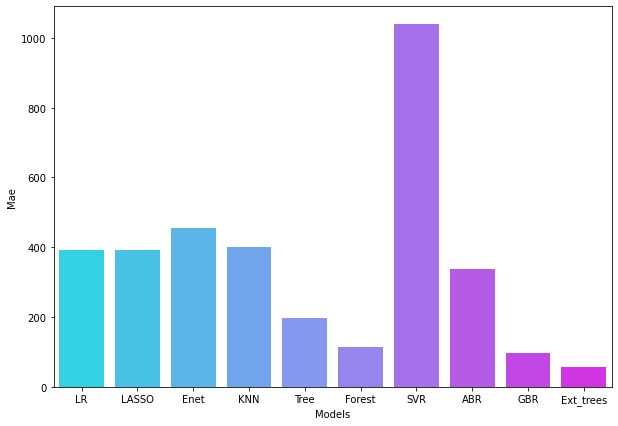

In [171]:
fig = plt.figure()

ind = np.arange(len(names))
width = 0.35

ax = fig.add_subplot(111)

sns.barplot(data=results, x='Models', y='Mae', palette='cool')

fig.set_size_inches(10,7)
ax.set_xticklabels(names);

#### TRAINING

In [172]:
model = ExtraTreesRegressor()

In [173]:
param_distributions = {'n_estimators':range(100,1000),
                       'max_depth':[None, 2, 4, 6,8, 10],
                       'min_samples_split':[None, 2, 4, 6,8, 10],
                       'ccp_alpha':[None,0.0001, 0.001, 0.001, 0.01, 0.1]                      }

In [174]:
random_search = RandomizedSearchCV(model,param_distributions=param_distributions, scoring='neg_mean_absolute_error', cv=6).fit(xtrain, ytrain)

In [175]:
random_search.best_score_

-62.93452632292223

In [176]:
final_model = random_search.best_estimator_
final_model

ExtraTreesRegressor(ccp_alpha=0.001, max_depth=10, min_samples_split=4,
                    n_estimators=392)

In [177]:
final_model.fit(xtrain, ytrain)

train_pred = final_model.predict(xtrain)
test_pred = final_model.predict(xtest)

### Results

In [178]:
train_mae = mean_absolute_error(ytrain,train_pred )
test_mae = mean_absolute_error(ytest,test_pred )

train_r2 = r2_score(ytrain,train_pred )
test_r2 = r2_score(ytest,test_pred )

train_rmse = np.sqrt(mean_squared_error(ytrain,train_pred ))
test_rmse = np.sqrt(mean_squared_error(ytest,test_pred ))

In [179]:
pd.DataFrame({'Train':[train_mae,train_r2,train_rmse],
             'Test':[test_mae,test_r2, test_rmse],
             'Baseline':[base_mae,0,base_rmse]},
            index = ['MAE', 'R2', 'RMSE'])

Train        Test    Baseline
MAE   25.040790   99.472956  1145.29875
R2     0.998304    0.937910     0.00000
RMSE  67.463690  478.596440  1638.15230

**Note: Model performs better than the baseline which indicates good model performance. However, model is overfitting.**